# Background Overview

In recent years, data science as a profession has skyrocketed in popularity due to the advancement of data storage and processing power. With a growing interest in big data, businesses are also looking for people with the skills to analyze all this abundant information to help unearth unprecedented insights and make data-driven decisions. According to the website “Business Insider”, Data Scientists will be the 2nd most sought after roles in 2022 just behind Artificial Intelligence Specialists. Finding patterns and trends, creating algorithms and data models, and using state-of-the-art machine learning techniques to deliver insights to stakeholders are just some of the common tasks for experienced Data Scientists. 

Data scientists can add value to any business who can use their data well. That is why it is important for businesses to understand how to hire and what to look for in the best data scientists. Nowadays, there exists a lot of ambiguity regarding the role of data scientists. Data engineers, data analysts, business analysts, and machine learning engineers are all similar, but different roles that somewhat overlap with Data Scientists in terms of reputation and responsibility. It is important for people, especially those hiring, to clearly distinguish the difference between all these roles and identify what a good Data Scientist truly needs in his/her analytical toolbox and how much he/she deserves to get paid. Not only will this help companies save time from running meaningless interviews, this will also prevent the waste of money and save the trouble of faulty hiring. Human resources (HR) companies and bootcamps will also appreciate learning about the insights to this analysis in order to find better talent and prepare students more effectively for the tech workforce.



-------------------------------

# Related Research

For reference purposes, we studied three web articles. There are the following tendencies:

- Salary of Data scientist tends to be high over all（Even in early-career stage)
- Experience level is one of the most important factors in a Data scientist salary.

Out of all the possible data roles:
1. Data Scientist
2. Data Analyst
3. Data Science/Analyst Manager
4. Big Data Engineer <br>

Data Scientists have the highest salary range between 85,000 - 170,000 dollars followed by data science managers between 90,000 - 140,000 dollars. Perhaps not surprisingly, some of the highest paid data scientists work at leading tech companies with Google, Apple, and Twitter leading the bunch. Additionally, the larger the company, the higher the salary. For example, a data scientist working in a company with at least 10,000 employees would likely earn a higher income than the same role at a company with less than 1,000 employees. Finally, people who had the habit of coding around 4-8 hours a week got paid more than those who didn't code at all in their spare time. These valuable research statistics will all be factored into our hypothesis and analysis below.   


-------------------------------

# Notebook Setup



In [ ]:
#Install necessary libraries and packages
#if (!require(mice)) install.packages("mice")
#if (!require(googledrive)) install.packages("googledrive") #only need to install occasionally
#if (!require(httpuv)) install.packages("httpuv") 
#if (!require(ggpubr)) install.packages("ggpubr") 
#if (!require(rsample)) install.packages("rsample")
#if (!require(Metrics)) install.packages("Metrics")
#if (!require(car)) install.packages("car")
#if (!require(caret)) install.packages("caret")
#if (!require(glmnet)) install.packages("glmnet")
#if (!require(validate)) install.packages("validate")
#if (!require(assertr)) install.packages("assertr")
#if (!require(stargazer)) install.packages("stargazer")
#library(googledrive) 

library(tidyverse)
library(mice)
library(dplyr)
library(forcats)
library(ggplot2)
library(httpuv)
library(ggpubr)
library(glmnet)
library(rsample)
library(Metrics)
library(car)
library(caret)
library(rpart)
library(validate)
library(assertr)
library(stargazer)

#make sure R system is correctly installed
#if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may update python version  
                                       #occasionally
#  install.packages("R.utils")
#  library("R.utils")
#  library("httr")
#  my_check <- function() {return(TRUE)}
#  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
#  options(rlang_interactive=TRUE)
#}

In [ ]:
#Authorization Code:
#drive_auth(use_oob = TRUE, cache = FALSE)


-------------------------------

# Dataset 1: How much do data scientists earn in 2017-2020?
### https://www.kaggle.com/datasets/phuchuynguyen/datarelated-developers-survey-by-stack-overflow

This dataset comes from an end of year Stack Overflow Annual Developers Survey. Because of the increasing demand for data specialists, people are expecting higher and higher pay, so this data was collected in order to evaluate the expectations of the current market. 

Our main objective for this dataset is to figure out which data specialization role (data scientist, database administrator, data engineer, data analyst) is most correlated with salary. However, we will still be taking a close look at “EdLevel” and “YearsCodePro”, factors which we predict will have a significant impact on salary. 

We believe that data scientist's should have the highest pay out of the 4 possible data roles because it is the most broad out of the 4 and requires the most knowledge in every facet of data. All other 3 roles are specialized in completed a specific task in data. 

We also hypothesize that “YearsCodePro”and “Edlevel” will likely impact salary the most. We expect that the higher your education, the more coding experience, and the larger your company, the higher you will get paid for your Data Scientist position. In general, having a Master’s degree is much more reputable than having a Bachelor's degree and employees will generally pay you more for the extra education you’ve received. Additionally, the more years of coding experience you have will likely translate directly into your work production and effectiveness which will also result in your employer granting you higher pay.

## Exploratory Data Analysis

In [ ]:
# x1 <- drive_get("~/MGT6203_GP/processed_data_toDummies.csv")
# x1 <- drive_get("https://drive.google.com/file/d/1V-xY3YMqVeVbkEcScehjim9D4saOXvWP/view?usp=sharing")
#x1 <- drive_get(id = "1V-xY3YMqVeVbkEcScehjim9D4saOXvWP")
#drive_download(x1, overwrite=TRUE)

In [ ]:
# read dataset 1
ds1 <- read.csv("/content/processed_data_toDummies.csv")

In [ ]:
#take a look at what our data contains
str(ds1)
head(ds1)

'data.frame':	33601 obs. of  14 variables:
 $ Year                                         : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Hobbyist                                     : chr  "Yes, both" "Yes, I program as a hobby" "No" "Yes, I program as a hobby" ...
 $ ConvertedComp                                : num  43750 51282 25000 100000 27000 ...
 $ Country                                      : chr  "United Kingdom" "Denmark" "Israel" "United States" ...
 $ EdLevel                                      : chr  "Bachelor's degree" "Some college/university study without earning a bachelor's degree" "Some college/university study without earning a bachelor's degree" "Some college/university study without earning a bachelor's degree" ...
 $ Employment                                   : chr  "Employed full-time" "Employed part-time" "Employed full-time" "Employed full-time" ...
 $ JobSat                                       : int  4 10 6 5 7 10 4 8 10 10 ...
 $ Org

,Year,Hobbyist,ConvertedComp,Country,EdLevel,Employment,JobSat,OrgSize,UndergradMajor,YearsCodePro,Data.scientist.or.machine.learning.specialist,Database.administrator,Data.or.business.analyst,Engineer..data
,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,2017,"Yes, both",43750.00,United Kingdom,Bachelor's degree,Employed full-time,4,2 to 9 employees,Computer science,2,1,1,NA,NA
2,2017,"Yes, I program as a hobby",51282.05,Denmark,Some college/university study without earning a bachelor's degree,Employed part-time,10,100 to 499 employees,Computer science,3,1,0,NA,NA
3,2017,No,25000.00,Israel,Some college/university study without earning a bachelor's degree,Employed full-time,6,"5,000 to 9,999 employees",Computer science,4,1,0,NA,NA
4,2017,"Yes, I program as a hobby",100000.00,United States,Some college/university study without earning a bachelor's degree,Employed full-time,5,20 to 99 employees,Computer science,15,0,1,NA,NA
5,2017,"Yes, both",27000.00,Ukraine,Master's degree,Employed full-time,7,100 to 499 employees,Computer science,5,0,1,NA,NA
6,2017,"Yes, I program as a hobby",120000.00,United States,Bachelor's degree,Employed full-time,10,20 to 99 employees,Computer science,5,0,1,NA,NA


For this dataset we want to discover which data science relate role is most correlated with salary (between Data Scientists, Database Administrators, Data Analysts, and Data Engineer). Additionally, we will also be taking a close look at other variables such as education level and coding experience and their  influence on salary. 

In [ ]:
#look for NAs in our data
na_columns <- sapply(ds1, function(x) sum(is.na(x)))
print(na_columns)

                                         Year 
                                            0 
                                     Hobbyist 
                                            0 
                                ConvertedComp 
                                            0 
                                      Country 
                                            0 
                                      EdLevel 
                                            0 
                                   Employment 
                                            0 
                                       JobSat 
                                           75 
                                      OrgSize 
                                            0 
                               UndergradMajor 
                                            0 
                                 YearsCodePro 
                                           83 
Data.scientist.or.machine.learning.specialist 
             

As you can see, there are several NAs in the data engineering and business analyst columns, so we need to pre-fill it with 0s as these data roles have already been one-hot encoded previously. We also want to make sure no one accidently made a mistake when inputting their salary, so we'll only be looking at salaries higher than 25,000. According to springboard.com, the minmum entry-level data analyst salary is around 27,000. 

In [ ]:
#replace NAs with 0 and remove empty strings
ds1$Engineer..data[is.na(ds1$Engineer..data)] <- 0
ds1$Data.or.business.analyst[is.na(ds1$Data.or.business.analyst)] <- 0
ds1 <- ds1[ds1$EdLevel != "" & ds1$UndergradMajor != "",]
ds1 <- ds1[ds1$ConvertedComp > 25000,]

We will apply imputation with perturbation on the "YearsCodePro" and "JobSat" columns which describes how much coding experience someone has and their satisfcation at work. Imputaton with perturbation is known to have less impact on altering the distribution of the data by adding random errors. Also, note that you generally don't want to impute more than 5% of the data which we aren't. 


In [ ]:
#we impute using regression with perturbation on YearsCodePro and JobSat
before_imp_code <- ds1$YearsCodePro[!is.na(ds1$YearsCodePro)]
before_imp_job <- ds1$JobSat[!is.na(ds1$JobSat)]
imp_perturb <- mice(as.data.frame(ds1), method = "norm.nob")
ds1 <- complete(imp_perturb)


 iter imp variable
  1   1  JobSat*  YearsCodePro*
  1   2  JobSat*  YearsCodePro*
  1   3  JobSat*  YearsCodePro*
  1   4  JobSat*  YearsCodePro*
  1   5  JobSat*  YearsCodePro*
  2   1  JobSat*  YearsCodePro*
  2   2  JobSat*  YearsCodePro*
  2   3  JobSat*  YearsCodePro*
  2   4  JobSat*  YearsCodePro*
  2   5  JobSat*  YearsCodePro*
  3   1  JobSat*  YearsCodePro*
  3   2  JobSat*  YearsCodePro*
  3   3  JobSat*  YearsCodePro*
  3   4  JobSat*  YearsCodePro*
  3   5  JobSat*  YearsCodePro*
  4   1  JobSat*  YearsCodePro*
  4   2  JobSat*  YearsCodePro*
  4   3  JobSat*  YearsCodePro*
  4   4  JobSat*  YearsCodePro*
  4   5  JobSat*  YearsCodePro*
  5   1  JobSat*  YearsCodePro*
  5   2  JobSat*  YearsCodePro*
  5   3  JobSat*  YearsCodePro*
  5   4  JobSat*  YearsCodePro*
  5   5  JobSat*  YearsCodePro*


Warning message:
“Number of logged events: 56”


To make sure our imputation didn't change the density of the data, we plot the density graph on the data before imputation and after imputation. As you can see, the lines are a total match which means our data still has the same distribution. 



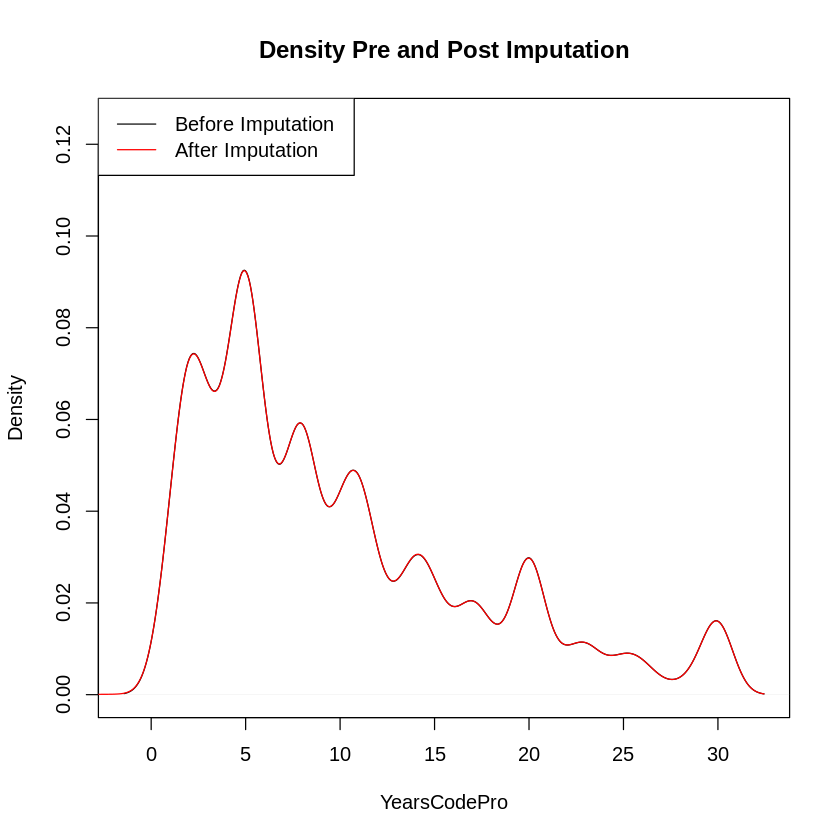

In [ ]:
#Density of YearsCodePro before and after
plot(density(before_imp_code), main = "Density Pre and Post Imputation", ylim = c(0, 0.125),xlab = "YearsCodePro")
points(density(ds1$YearsCodePro), type = "l", col = "red")
legend("topleft",c("Before Imputation", "After Imputation"),lty = 1,col = c("black", "red"))

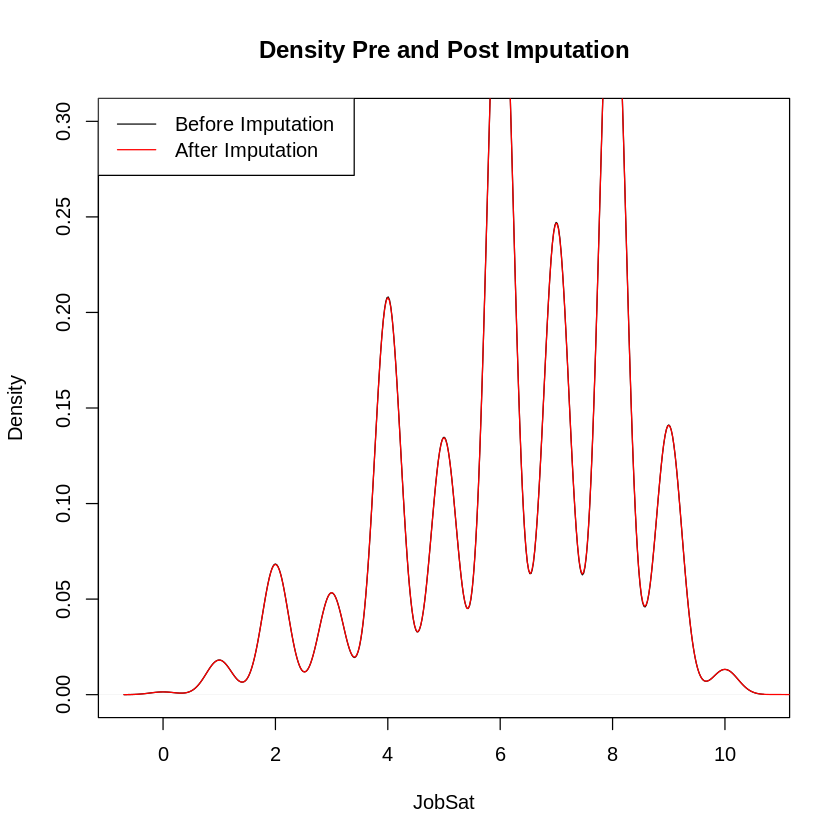

In [ ]:
#Density of observed JobSat before and after
plot(density(before_imp_job), main = "Density Pre and Post Imputation", ylim = c(0, 0.3),xlab = "JobSat")
points(density(ds1$JobSat), type = "l", col = "red")
legend("topleft",c("Before Imputation", "After Imputation"),lty = 1,col = c("black", "red"))

Now let's take a look at our response variable salary. Looking at the distribution, we see that it is greatly right skewed with most of the salaries on the lower end. There are lots of outliers (people who earn a lot more money than the rest). 

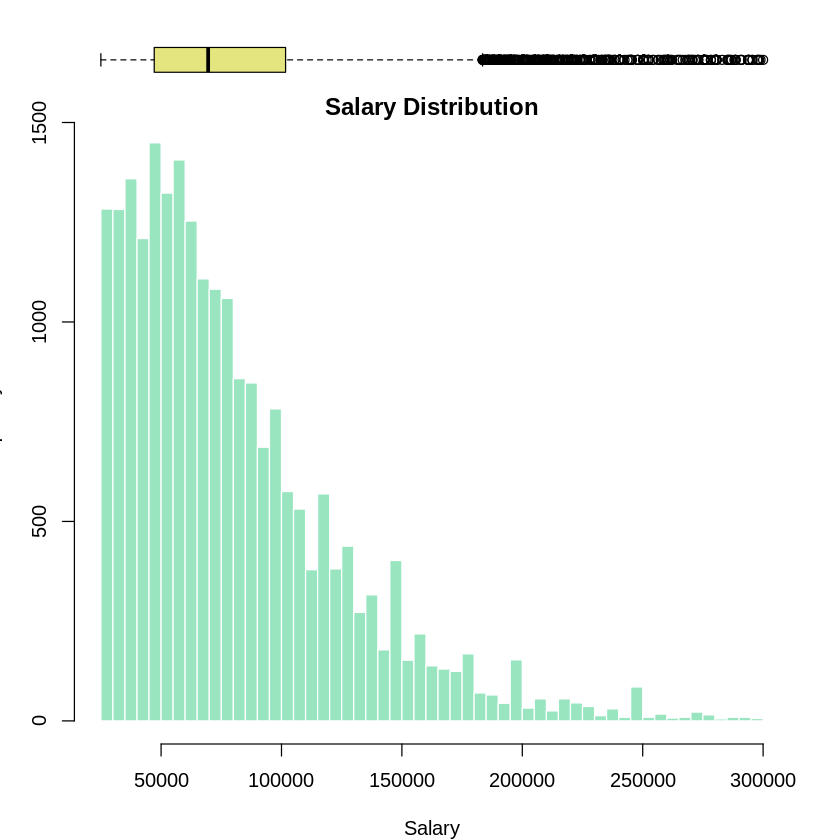

In [ ]:
# Layout to split the screen
layout(mat = matrix(c(1,2),2,1, byrow=TRUE),  height = c(1,8))
 
# Draw the boxplot and the histogram 
par(mar=c(0, 3.1, 1.1, 2.1))
boxplot(ds1$ConvertedComp , horizontal=TRUE , xaxt="n" , col=rgb(0.8,0.8,0,0.5) , frame=F)
par(mar=c(4, 3.1, 1.1, 2.1))
hist(ds1$ConvertedComp , breaks=40 , col=rgb(0.2,0.8,0.5,0.5) , border=F , main="Salary Distribution" , xlab="Salary")

Looking at the different undergraduate majors of data scientists, we see that most people are indeed computer science or engineering majors. Surprisingly, those that majored in the arts had the highest median out of all the other majors. This could be due to the smaller sample size of people majoring in arts though. 

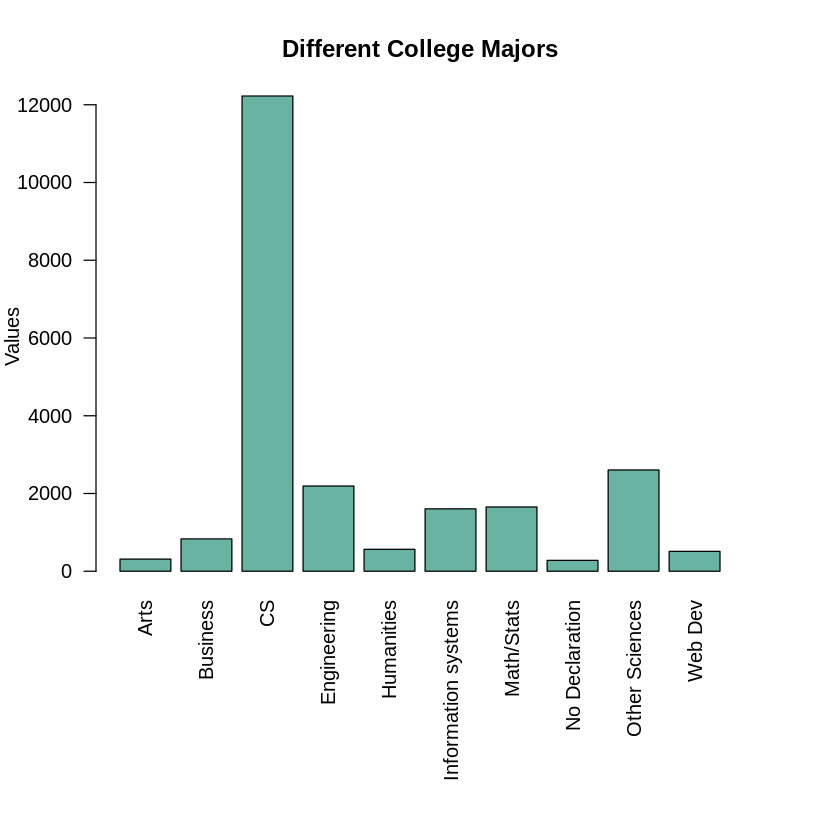

In [ ]:
#Narrow down the number of undergraduate majors
ds1 <- ds1 %>% 
mutate(UndergradMajor = ifelse(grepl("engineering", UndergradMajor), "Engineering", 
                        ifelse(grepl("Mathematics", UndergradMajor), "Math/Stats",
                        ifelse(grepl( "Web", UndergradMajor), "Web Dev",
                        ifelse(grepl("arts", UndergradMajor), "Arts",
                        ifelse(grepl("Computer science", UndergradMajor), "CS",
                        ifelse(grepl("science", UndergradMajor), "Other Sciences",
                        ifelse(grepl("never | else", UndergradMajor), "No Declaration", UndergradMajor))))))))

majors <- ds1 %>% count(UndergradMajor) %>% arrange(UndergradMajor)

# Increase margin size
par(mar=c(11,4,4,4))

barplot(height=majors$n, names.arg=unique(majors$UndergradMajor), 
        col="#69b3a2", 
        ylab="Values", 
        main="Different College Majors",
        las=2)

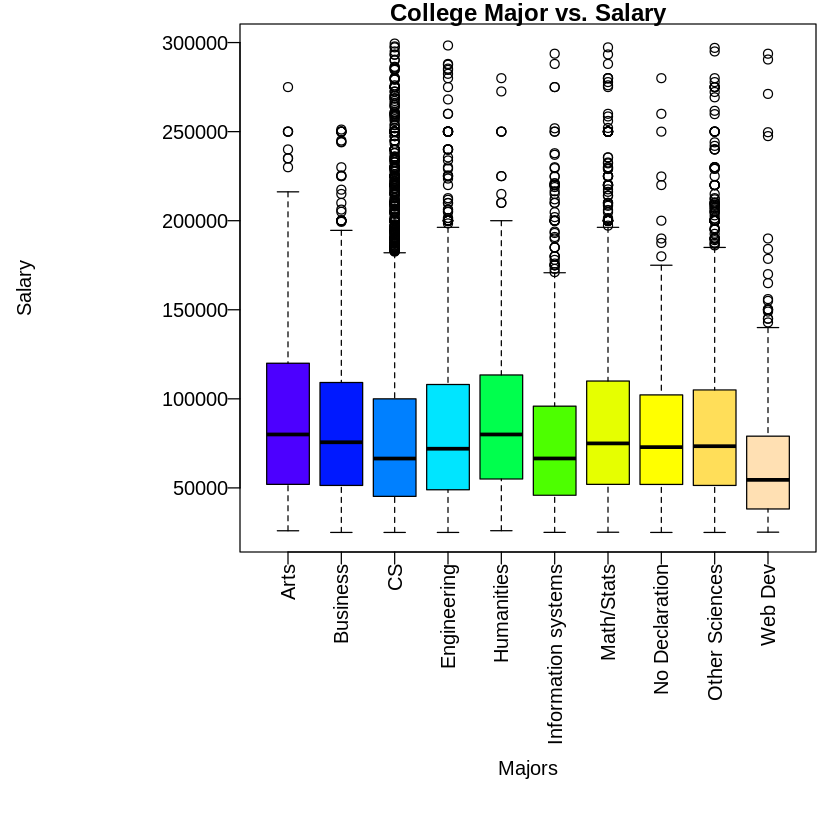

In [ ]:
par(mar=c(12,10,1,1), mgp = c(8.5, 0.5, 0))

#Salary and Major
boxplot(ConvertedComp ~ UndergradMajor, ds1, col=topo.colors(10) , ylab="Salary" , 
    xlab="Majors", las = 2, main = "College Major vs. Salary")


Looking at highest education level, we see that most data scientists only have bachelor's degrees followed by master's and as expected, people with a doctoral degree had the highest median compared to the other degrees. We did predict that people who have received a higher education will receive a higher pay from their company. 

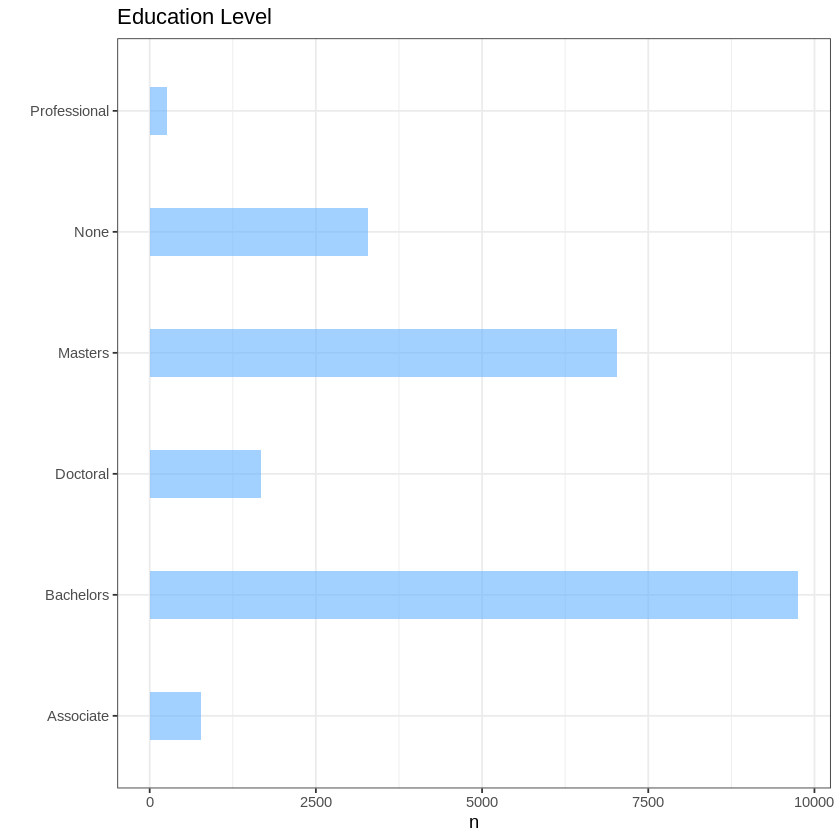

In [ ]:
#Narrow down the education levels
ds1 <- ds1[ds1$EdLevel != "Secondary school",]
ds1 <- ds1 %>% 
mutate(EdLevel = ifelse(grepl("Some", EdLevel), "None",
                ifelse(grepl("Bachelor's", EdLevel), "Bachelors",
                ifelse(grepl("Master's", EdLevel), "Masters",
                ifelse(grepl("Doctoral", EdLevel), "Doctoral",
                ifelse(grepl("Professional", EdLevel), "Professional",
                ifelse(grepl("Associate", EdLevel), "Associate",
                EdLevel)))))))

EdLevel <- ds1 %>% count(EdLevel) %>% arrange(EdLevel)

EdLevel %>%
ggplot( aes(x=EdLevel, y=n)) +
    geom_bar(stat="identity", fill="#66B2FF", alpha=.6, width=.4) +
    coord_flip() +
    ggtitle("Education Level")+
    xlab("") +
    theme_bw()

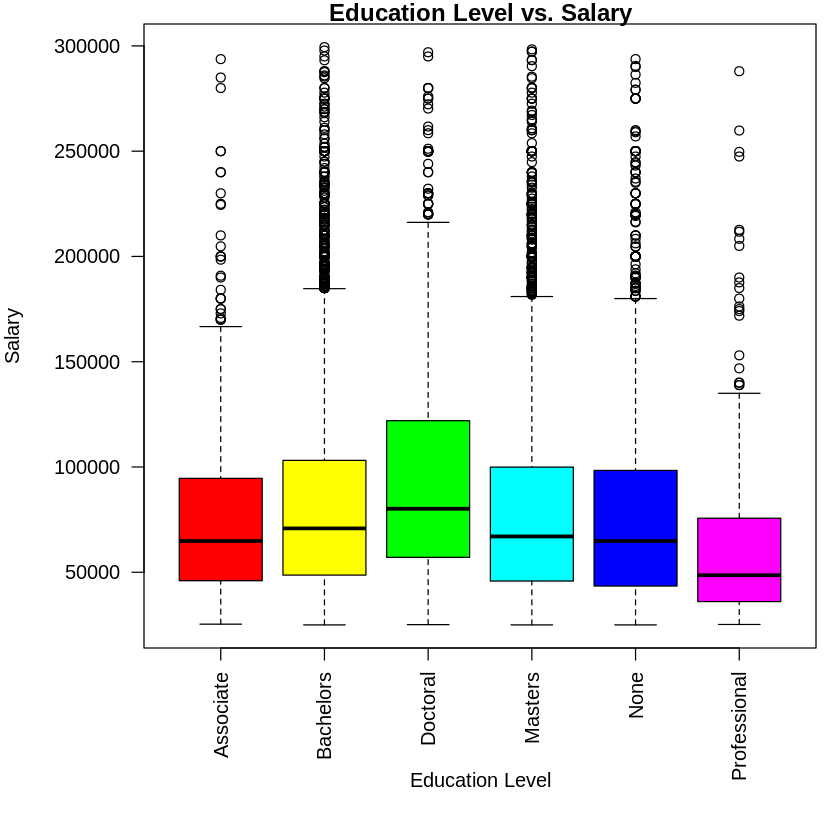

In [ ]:
par(mar=c(8,6,1,1), mgp = c(5, 1, 0))

#Salary and Education Level
boxplot(ConvertedComp ~ EdLevel, ds1, col=rainbow(6) , ylab="Salary" , 
    xlab="Education Level", main = "Education Level vs. Salary", las = 2)

Looking at our 4 main data science related roles, we see that most people are database administrators followed by data scientists. Data Engineers have the least amount of people, but have the highest median pay out of all 4 roles. We suspect this is because data engineering requires a heavier computer science program, so the entry level is much higher and thus the pay is also much higher. 

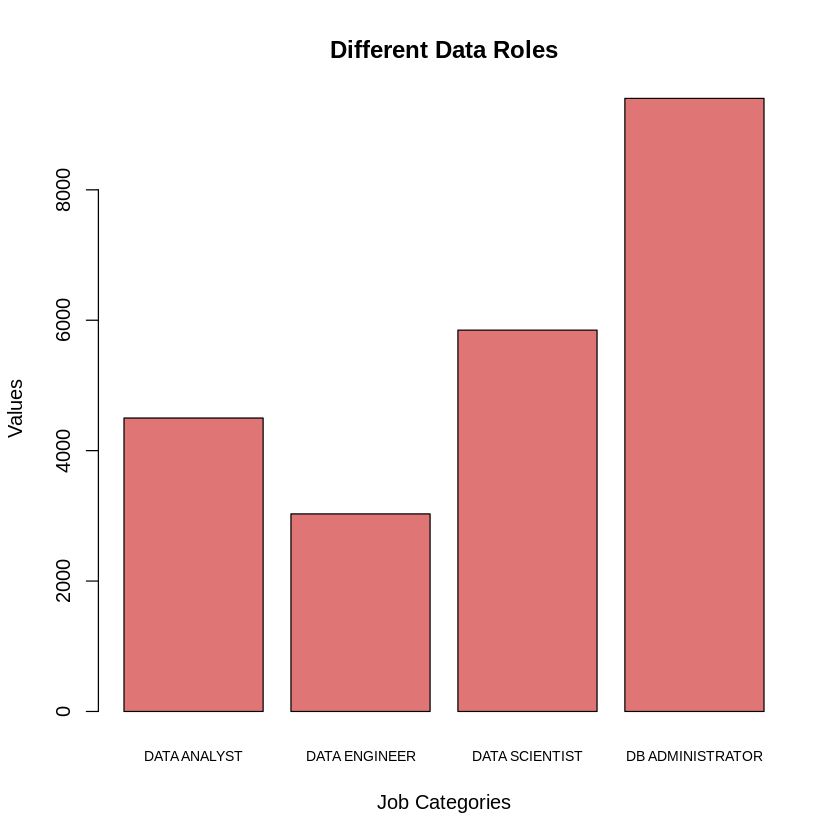

In [ ]:
#plot some nice graphs
colnames(ds1)[11:14] <- c("Data Scientist", "DB Administrator", "Data Analyst", "Data Engineer")
job_roles <- ds1[,11:14]
ds1$positions <- toupper(names(ds1[,11:14])[max.col(ds1[,11:14])])
job_roles$positions <- toupper(names(job_roles)[max.col(job_roles)])
job_roles <- job_roles %>% count(positions)
job_roles <- job_roles[order(job_roles$positions),]

barplot(height=job_roles$n, names=job_roles$positions, 
        col=rgb(0.8,0.1,0.1,0.6),
        xlab="Job Categories", 
        ylab="Values", 
        main="Different Data Roles",
        cex.names = 0.7)

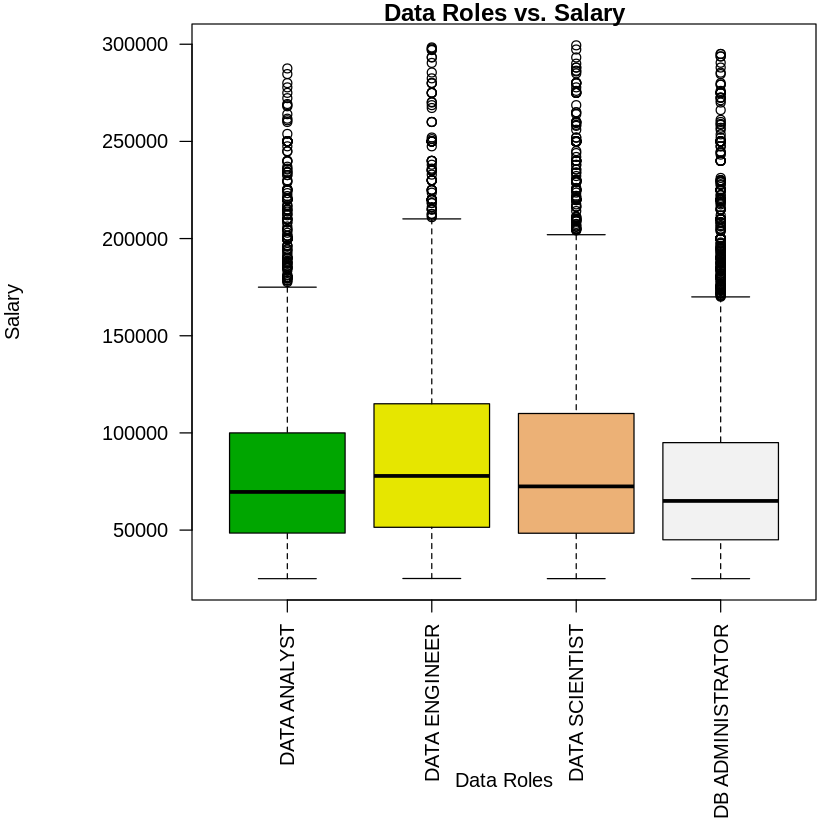

In [ ]:
par(mar=c(10,8,1,1), mgp = c(7, 1, 0))

#Salary and Data Roles
boxplot(ConvertedComp ~ positions, ds1, col=terrain.colors(4) , ylab="Salary" , 
    xlab="Data Roles", las = 2, main = "Data Roles vs. Salary")

There seems to be a general trend with job satistfaction. Those who are extremely satisfied at work tend to be paid more, and those who feel less satisfied (less than a 8) seem to be paid less, though feeling is extremely subjective.

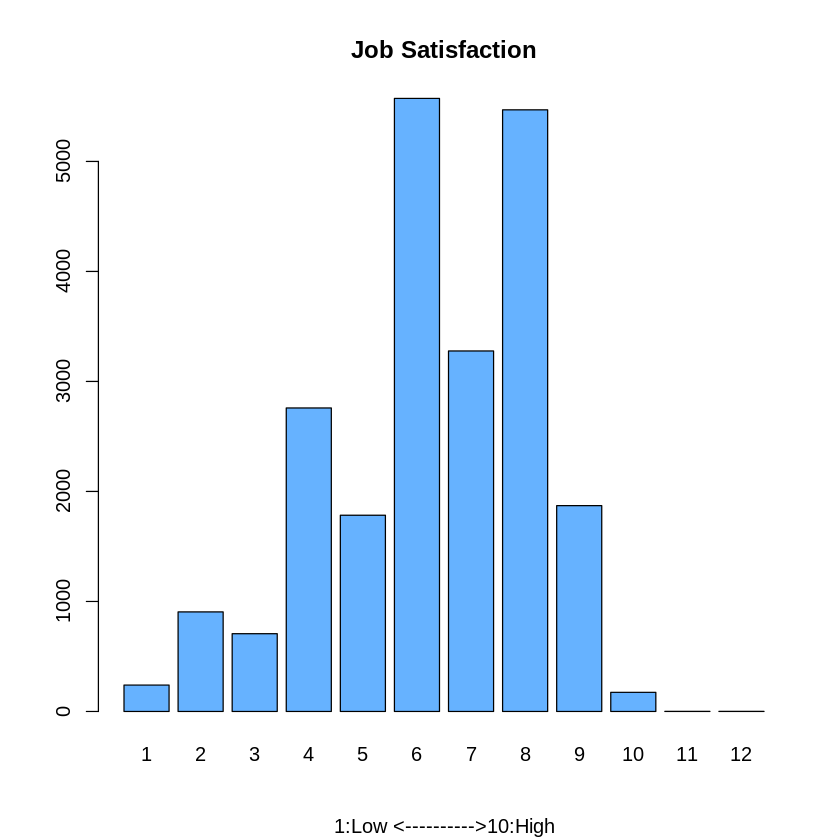

In [ ]:
#Job Satisfaction
ds1 <- ds1[ds1$JobSat != 0,]
barplot(height = table(round(ds1$JobSat)), col="#66B2FF", main="Job Satisfaction", sub="1:Low <---------->10:High")

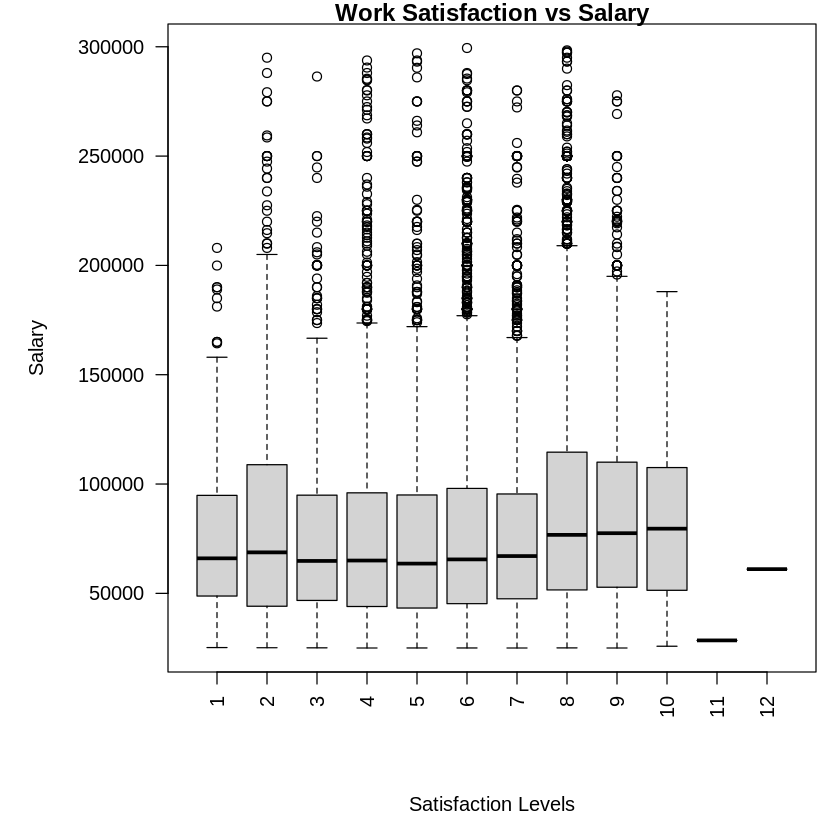

In [ ]:
par(mar=c(7,7,1,1), mgp = c(5, 1, 0))

#Salary and Job Satisfaction
boxplot(ConvertedComp ~ round(JobSat), ds1,
    xlab="Satisfaction Levels", ylab = "Salary", main = "Work Satisfaction vs Salary", las = 2)

Whether or not you code as a hobby seems to not have any affect on salary. You can still earn a good amount even if you don't code in your spare time 

In [ ]:
# Draw graph for Hobbyist
# Convert
ds1$Hobbyist <- ifelse(ds1$Hobbyist=="No", "No",
                ifelse(ds1$Hobbyist=="Yes", "Yes",
                ifelse(ds1$Hobbyist=="Yes, both", "Yes",
                ifelse(ds1$Hobbyist=="Yes, I contribute to open source projects", "Yes",
                ifelse(ds1$Hobbyist=="Yes, I program as a hobby", "Yes",ds1$Hobbyist)))))

# Table
summarise(group_by(ds1, Hobbyist), CNT=n(), "%"=round(n()/nrow(ds1)*100,1))

Hobbyist,CNT,%
<chr>,<int>,<dbl>
No,4251,18.7
Yes,18510,81.3


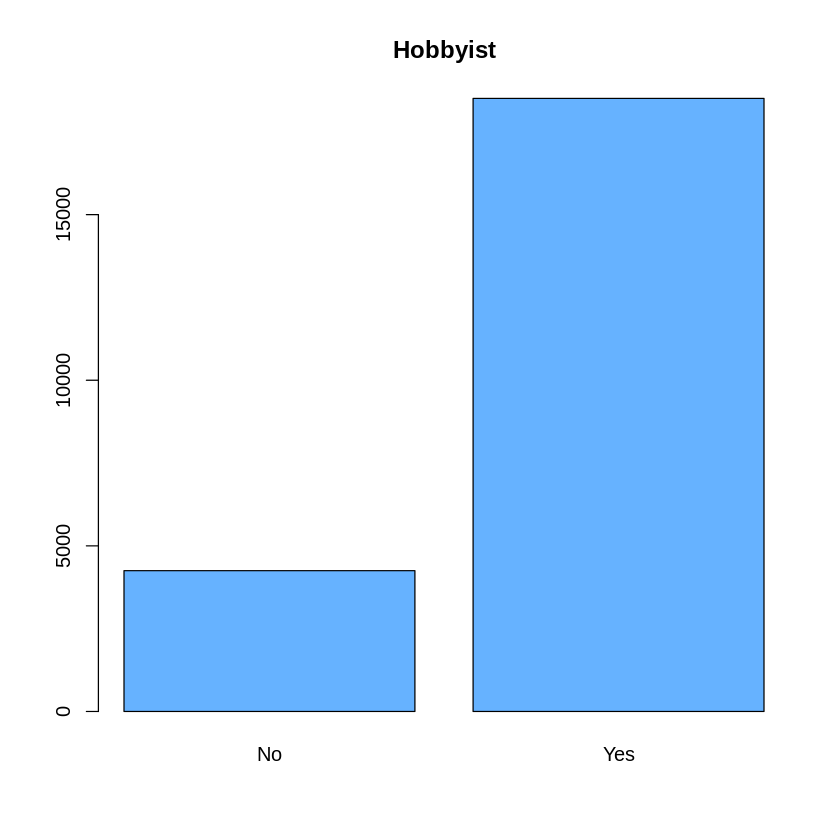

In [ ]:
# Graph Hobbyist
barplot(table(ds1$Hobbyist),col="#66B2FF", main="Hobbyist")

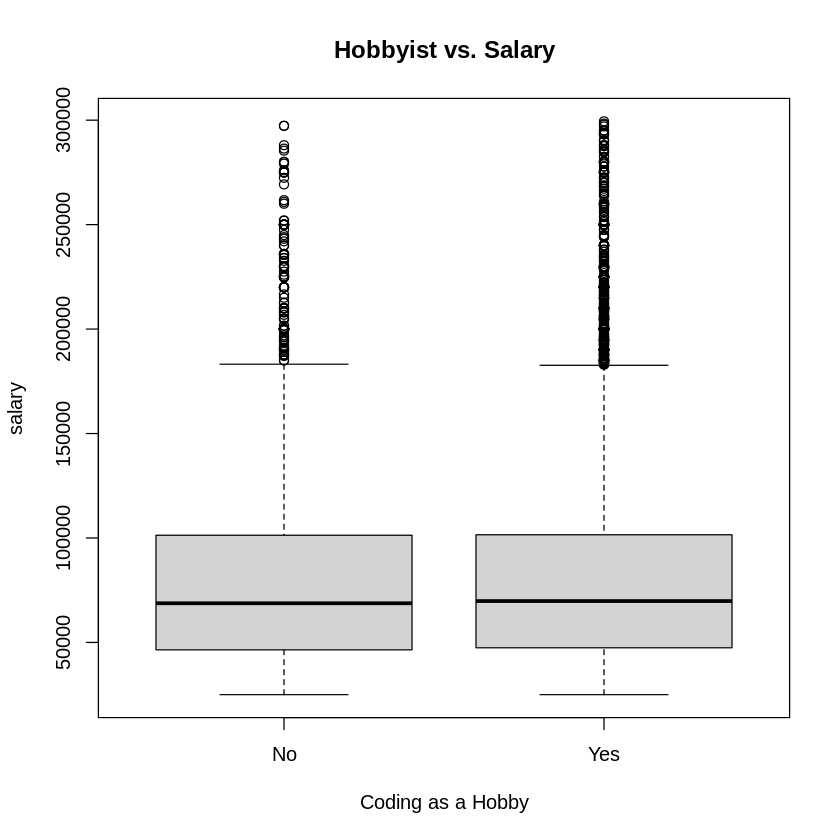

In [ ]:
# Graph Salary and Hobbyist
boxplot(ConvertedComp ~ Hobbyist, ds1,
    xlab="Coding as a Hobby", ylab = "salary", main = "Hobbyist vs. Salary")

In general, it seems like large companies pay more than smaller companies. This could be because larger companies have higher revenues and can afford to pay higher salaries to recruit better talent. 

In [ ]:
#Draw graph for OrgSize
# Convert
ds1$OrgSize <- ifelse(ds1$OrgSize=="10,000 or more employees", "Large(1000+)",
                ifelse(ds1$OrgSize=="5,000 to 9,999 employees", "Large(1000+)",
                ifelse(ds1$OrgSize=="1,000 to 4,999 employees", "Large(1000+)",
                ifelse(ds1$OrgSize=="500 to 999 employees"    , "Medium(100-999)",
                ifelse(ds1$OrgSize=="100 to 499 employees"    , "Medium(100-999)",
                ifelse(ds1$OrgSize=="20 to 99 employees"      , "Small(2-99)",
                ifelse(ds1$OrgSize=="10 to 19 employees"      , "Small(2-99)",
                ifelse(ds1$OrgSize=="2 to 9 employees"        , "Small(2-99)",
                ifelse(ds1$OrgSize=="Just me - I am a freelancer, sole proprietor, etc.", "Solo", "Other")))))))))

# Table
summarise(group_by(ds1, OrgSize), CNT=n(), "%"=round(n()/nrow(ds1)*100,1))

OrgSize,CNT,%
<chr>,<int>,<dbl>
Large(1000+),6966,30.6
Medium(100-999),5203,22.9
Other,1057,4.6
Small(2-99),8899,39.1
Solo,636,2.8


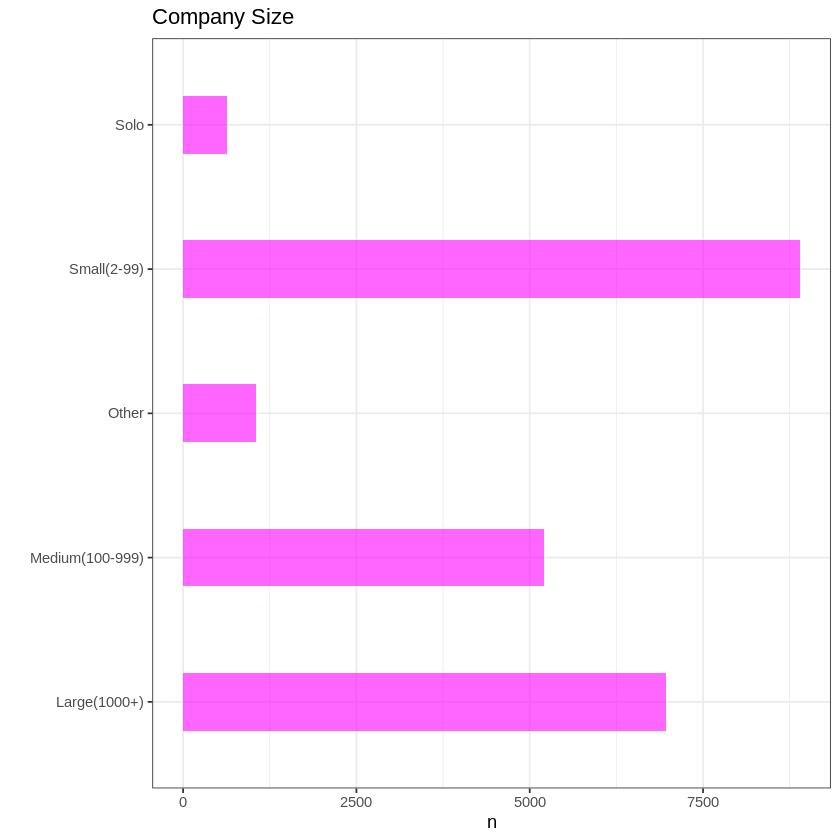

In [ ]:
# Graph Orgsize
OrgSize <- ds1 %>% count(OrgSize) %>% arrange(OrgSize)
OrgSize %>%
ggplot(aes(x=OrgSize, y=n)) +
    geom_bar(stat="identity", fill="#ff00ff", alpha=.6, width=.4) +
    coord_flip() +
    ggtitle("Company Size")+
    xlab("") +
    theme_bw()

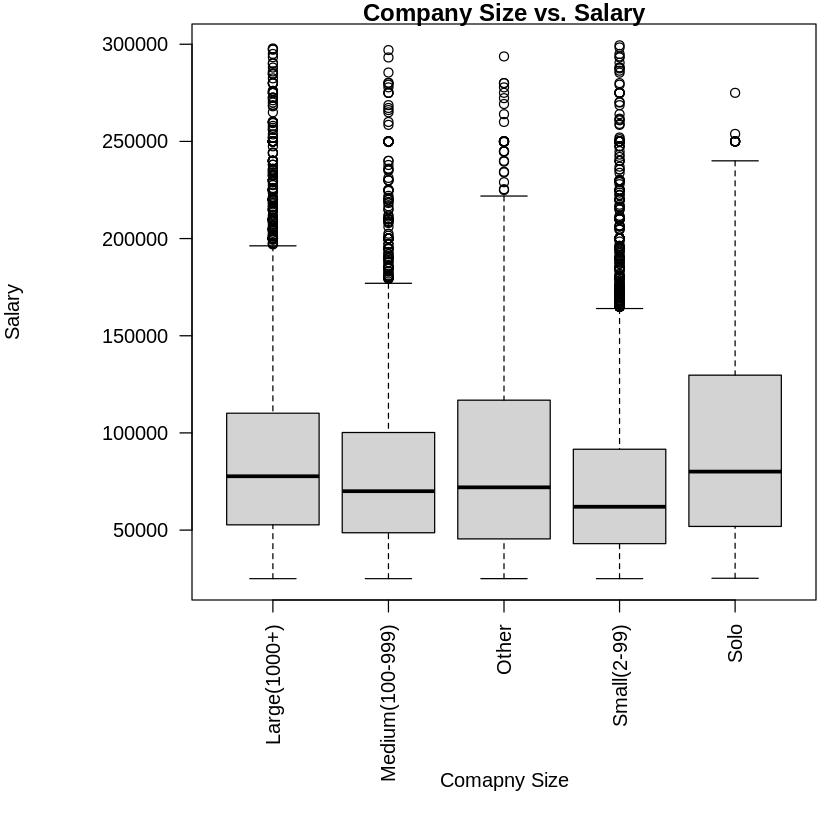

In [ ]:
par(mar=c(10,8,1,1), mgp = c(7, 1, 0))

#Salary and OrgSize
boxplot(ConvertedComp ~ OrgSize, ds1,
    xlab="Comapny Size", main = "Company Size vs. Salary", ylab = "Salary", las = 2)

It seems like the data scientists with 10 or more years of experience seems to get paid the most. There could be several reasons behind this. First of all, Data Scientists with 5 or more years of experience get awarded the "senior" title position which immediately grants them a higher salary. Secondly, more years of coding experience means you are better at what you do which results in better results at work and more production. 

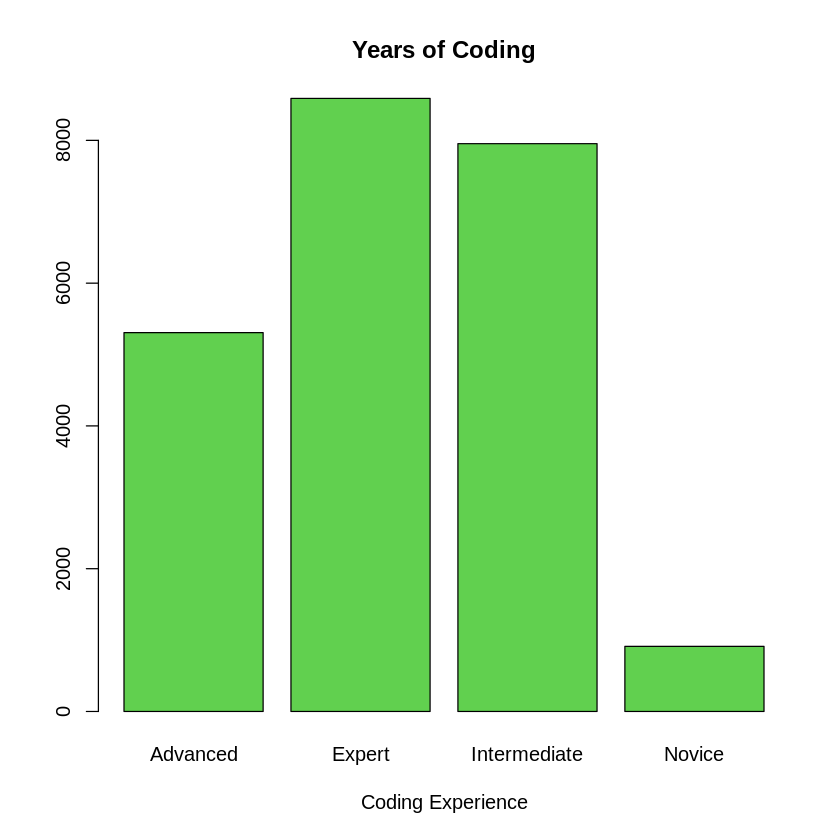

In [ ]:
#Graph YearsCodePro
ds1$YearsCodePro <- as.integer(ds1$YearsCodePro)
ds1 <- ds1 %>% 
      mutate(YearsCodeCat = ifelse(YearsCodePro < 2, "Novice",
                        ifelse(YearsCodePro >=2 & YearsCodePro < 6, "Intermediate", 
                        ifelse(YearsCodePro >= 6 & YearsCodePro < 11, "Advanced",
                                                                    "Expert"))))

barplot(height = table(ds1$YearsCodeCat), col=3, xlab = "Coding Experience", main="Years of Coding")

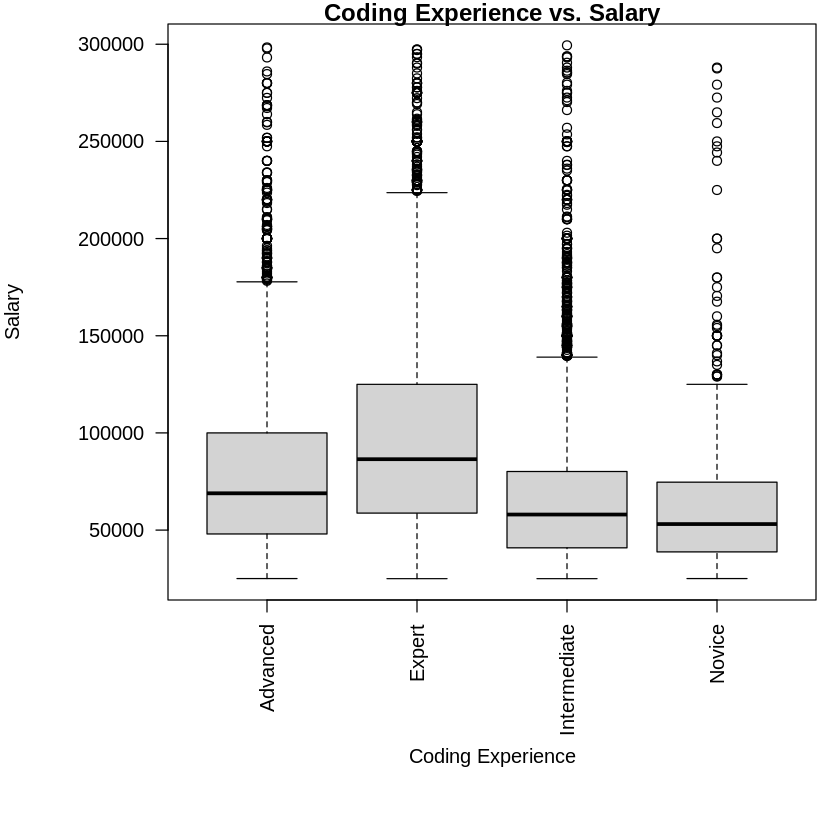

In [ ]:
par(mar=c(10,7,1,1), mgp = c(6, 1, 0))

#Salary and YearsCodePro
boxplot(ConvertedComp ~ YearsCodeCat, ds1,
    xlab="Coding Experience", main = "Coding Experience vs. Salary", ylab = "Salary", las = 2)


-------------------------------

#Dataset2: Data Sciense and STEM Salaries
https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries

This dataset originated from the website "levels.fyi" which is the assimilation of a myraid of tech salaries. This makes it easier to compare and contrast the work compensations and condition across different companies in the industry.

We have 3 main objectives we want to accomplish here: 
  * Compare the pay of data scientists versus that of other similar roles in STEM 
  * Compare the pay of data scientists in different companies
  * Compare the pay of data scientists based on demographics (gender, race, etc.)

A large part of our analysis here will be using exploratory data analysis techniques like graphs, charts, and plots that can help us visualize our salary data. Though we mentioned our key 3 main objectives above, we will still be keeping a close look on how other factors end up influencing salary like “yearsofexperience” and “yearsatcompany” which we know will definitely have some level of impact. 

We expect that "Masters_Degree", "Doctorate_Degree", and "FAANGM" (FAANGM is an acronym for Facebook, Amazon, Apple, Netflix, Google, and Microsoft) will be statistically significant. Educational background is probably also important as we mentioned above. There is no doubt that large and reputable companies like FAANGM pay higher salary compared to the smaller companies.


##Exploratory Data Analysis

In [ ]:
# x2 <- drive_get("~/MGT6203_GP/Levels_Fyi_Salary_Data.csv")
# x2 <- drive_get("https://drive.google.com/file/d/1LeBZfsKNyLSOJ-F84AbpvQLVDerWgMqJ/view?usp=sharing")
# setup google drive to import dataset
x2 <- drive_get(id="1LeBZfsKNyLSOJ-F84AbpvQLVDerWgMqJ")
drive_download(x2,overwrite=TRUE)

File downloaded:

• Levels_Fyi_Salary_Data.csv <id: 1LeBZfsKNyLSOJ-F84AbpvQLVDerWgMqJ>

Saved locally as:

• Levels_Fyi_Salary_Data.csv



In [ ]:
# see what the dataset looks like
str(ds2)
head(ds2)

'data.frame':	62642 obs. of  29 variables:
 $ timestamp              : chr  "6/7/2017 11:33:27" "6/10/2017 17:11:29" "6/11/2017 14:53:57" "6/17/2017 0:23:14" ...
 $ company                : chr  "Oracle" "eBay" "Amazon" "Apple" ...
 $ level                  : chr  "L3" "SE 2" "L7" "M1" ...
 $ title                  : chr  "Product Manager" "Software Engineer" "Product Manager" "Software Engineering Manager" ...
 $ totalyearlycompensation: int  127000 100000 310000 372000 157000 208000 300000 156000 120000 201000 ...
 $ location               : chr  "Redwood City, CA" "San Francisco, CA" "Seattle, WA" "Sunnyvale, CA" ...
 $ yearsofexperience      : num  1.5 5 8 7 5 8.5 15 4 3 12 ...
 $ yearsatcompany         : num  1.5 3 0 5 3 8.5 11 4 1 6 ...
 $ tag                    : chr  NA NA NA NA ...
 $ basesalary             : num  107000 0 155000 157000 0 0 180000 135000 0 157000 ...
 $ stockgrantvalue        : num  20000 0 0 180000 0 0 65000 8000 0 26000 ...
 $ bonus                  : num  1

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NA,107000,⋯,0,0,0,0,0,0,0,0,NA,NA
2,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA
3,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NA,155000,⋯,0,0,0,0,0,0,0,0,NA,NA
4,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NA,157000,⋯,0,0,0,0,0,0,0,0,NA,NA
5,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA
6,6/21/2017 17:27:47,Microsoft,63,Software Engineer,208000,"Seattle, WA",8.5,8.5,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA


This dataset seems to contain a lot more columns and information about demographics. Looking at the first few rows though, there seems to be a lot of missing information. 

In [ ]:
#look for NAs in our data
na_columns_ds2 <- sapply(ds2, function(x) sum(is.na(x)))
print(na_columns_ds2)

              timestamp                 company                   level 
                      0                       0                      15 
                  title totalyearlycompensation                location 
                      0                       0                       0 
      yearsofexperience          yearsatcompany                     tag 
                      0                       0                     808 
             basesalary         stockgrantvalue                   bonus 
                      0                       0                       0 
                 gender            otherdetails                  cityid 
                  19540                   22504                       0 
                  dmaid               rowNumber          Masters_Degree 
                      2                       0                       0 
       Bachelors_Degree        Doctorate_Degree              Highschool 
                      0                       0    

There is an overwhelming amount of NAs in some of our columns. Because our dataset comes from a website where people manually input their information, there is a considerable amount of human error in the process. Particularly, the race and education column has close to 50% of NAs which is probably caused by people unwilling to share private demographic information about themselves. 

With situations like these, we either have to impute the data with some form of prediction modeling or just remove those data points completely. Due to time constraints, we will likely just remove the rows with missing values in this example completely. The downside of removing all those rows is that now we will not be sure if the results of our analysis will be significant and applicable to the entire population of data scientists. Nevertheless, we still have other useful columns that we can conduct our analysis on. 

**1. Dependent Value**

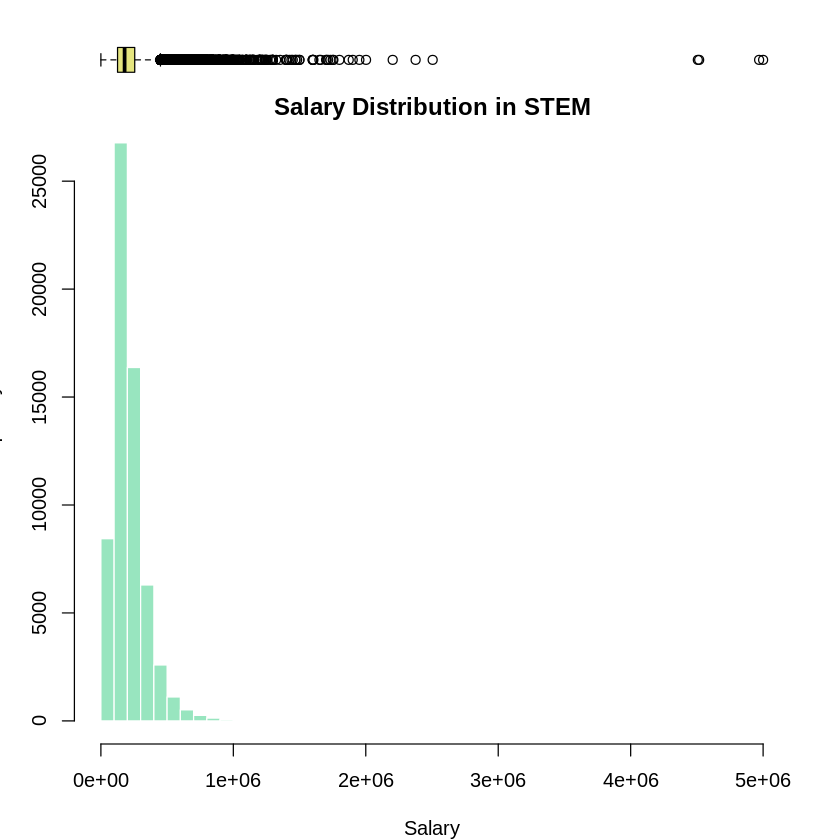

In [ ]:
#### totalyearlycompensation
#Graph
# Layout to split the screen
layout(mat = matrix(c(1,2),2,1, byrow=TRUE),  height = c(1,8))
 
# Draw the boxplot and the histogram 
par(mar=c(0, 3.1, 1.1, 2.1))
boxplot(ds2$totalyearlycompensation , horizontal=TRUE , xaxt="n" , col=rgb(0.8,0.8,0,0.5) , frame=F)
par(mar=c(4, 3.1, 1.1, 2.1))
hist(ds2$totalyearlycompensation , breaks=40 , col=rgb(0.2,0.8,0.5,0.5) , border=F , main="Salary Distribution in STEM" , xlab="Salary")


Most people in STEM are generally paid between 100,000 to 300,000 dollars, with several outliers getting paid more than 500,000 a year. Just like our previous salary graph in dataset1, salary seems to follow a right skewed normal distribution graph; however, it seem like people in STEM are paid a lot more than people working in data related roles. We will use the "totalyearlycompensation" column as a dependent variable.

**2. Candidates for Independent Value**

2-1. company

In [ ]:
#### Company
# Table
head(summarise(group_by(ds2, company), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT)))

company,CNT,%
<chr>,<int>,<dbl>
Amazon,8126,13.0
Microsoft,5216,8.3
Google,4330,6.9
Facebook,2990,4.8
Apple,2028,3.2
Oracle,1128,1.8


In [ ]:
#### Company
ds2$GAFAM <-  as.factor(ifelse(ds2$company=="Google",   1,
                        ifelse(ds2$company=="Amazon",   1,
                        ifelse(ds2$company=="Facebook", 1,
                        ifelse(ds2$company=="Apple",   1,
                        ifelse(ds2$company=="Microsoft",1, 0))))))

ds2$FAANG <-  as.factor(ifelse(ds2$company=="Facebook", 1,
                        ifelse(ds2$company=="Amazon",   1,
                        ifelse(ds2$company=="Apple",    1,
                        ifelse(ds2$company=="Netflix",  1,
                        ifelse(ds2$company=="Google",   1, 0))))))

ds2$FAANGM <- as.factor(ifelse(ds2$company=="Facebook", 1,
                        ifelse(ds2$company=="Amazon",   1,
                        ifelse(ds2$company=="Apple",    1,
                        ifelse(ds2$company=="Netflix",  1,
                        ifelse(ds2$company=="Google",   1,
                        ifelse(ds2$company=="Microsoft",1, 0)))))))

# Table/Graph
summarise(group_by(ds2, GAFAM),  CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))
#barplot(table(ds2$GAFAM), col="#66B2FF", main="GAFAM")

summarise(group_by(ds2, FAANG),  CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))
#barplot(table(ds2$FAANG), col="#66B2FF", main="FAANG")

summarise(group_by(ds2, FAANGM), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))
#barplot(table(ds2$FAANGM),col="#66B2FF", main="FAANGM")

GAFAM,CNT,%
<fct>,<int>,<dbl>
0,39952,63.8
1,22690,36.2


FAANG,CNT,%
<fct>,<int>,<dbl>
0,44900,71.7
1,17742,28.3


FAANGM,CNT,%
<fct>,<int>,<dbl>
0,39684,63.4
1,22958,36.6


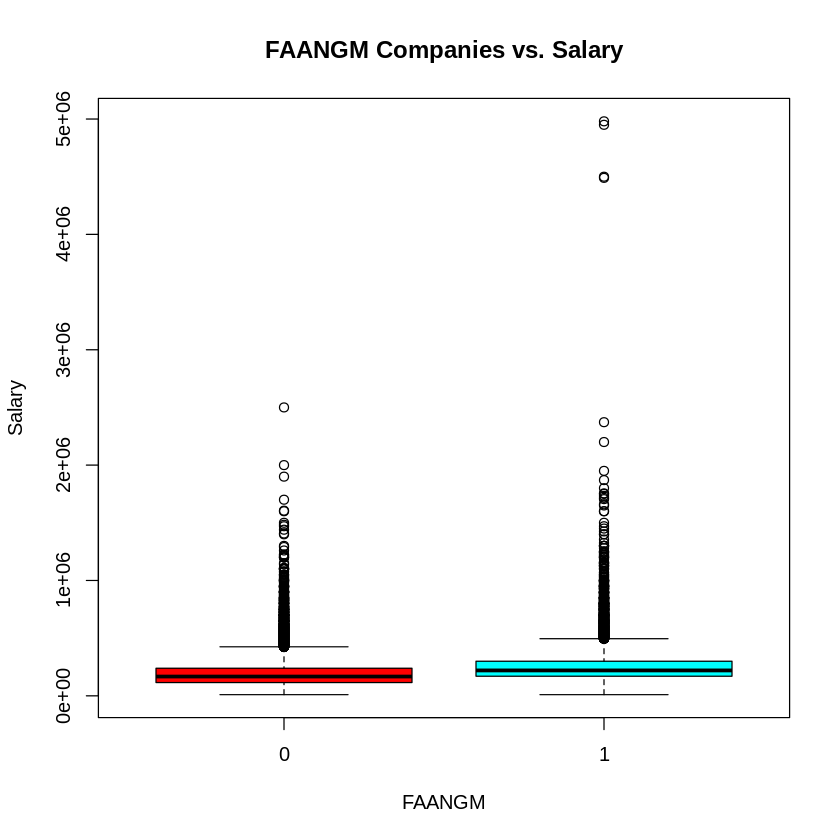

In [ ]:
#Salary and Education Level
boxplot(totalyearlycompensation ~ FAANGM, ds2, col=rainbow(2) , ylab="Salary" , 
    xlab="FAANGM", main= "FAANGM Companies vs. Salary")

We would like to compare the pay of data scientists in different companies. It is impractical to use this column without some transformation because there are 1102 unique values. We created the three indicator variables: GAFAM, FAANG,and FAANGM.

As you can see, GAFAM(Google, Amazon, Facebook, Apple, and Microsoft) employees account for 36.2% (more than 1/3) of all respondents. The second largest group was the other tech companies and SaaS providers like Oracle, Intel or Salesforce.

FAANGM (GAFAM + Netflix) employees totals up to 36.6% while FANNG (FAANGM - Microsoft) sums up to 28.3%. This means respondents from Microsoft is larger than ones from Netflix. 

Overall, FAANGM seems to pay slightly better than most companies.

2-2. title (Job Position)

In [ ]:
#### title
# Table
summarise(group_by(ds2, title), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))

title,CNT,%
<chr>,<int>,<dbl>
Software Engineer,41231,65.8
Product Manager,4673,7.5
Software Engineering Manager,3569,5.7
Data Scientist,2578,4.1
Hardware Engineer,2200,3.5
Product Designer,1516,2.4
Technical Program Manager,1381,2.2
Solution Architect,1157,1.8
Management Consultant,976,1.6


It seems like based on the boxplot, software engineering managers get paid the most. Business analysts and recruiters get paid the least as those are the least tech related jobs. Most people work as software engineers though. 

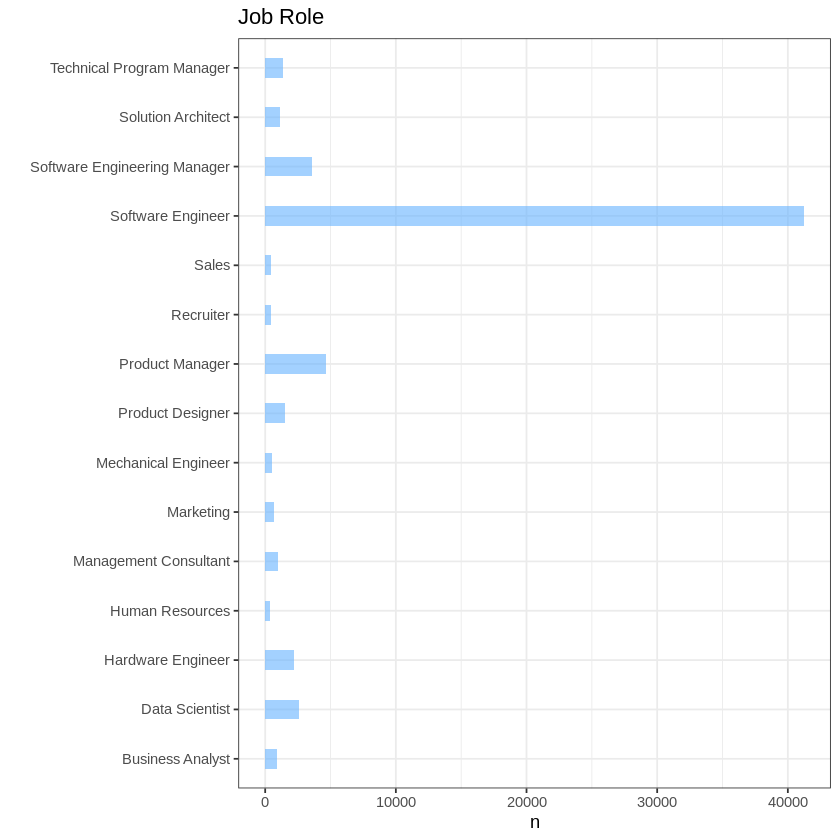

In [ ]:
# Graph job roles
title <- ds2 %>% count(title) %>% arrange(title)

title %>%
ggplot( aes(x=title, y=n)) +
    geom_bar(stat="identity", fill="#66B2FF", alpha=.6, width=.4) +
    coord_flip() +
    ggtitle("Job Role")+
    xlab("") +
    theme_bw()

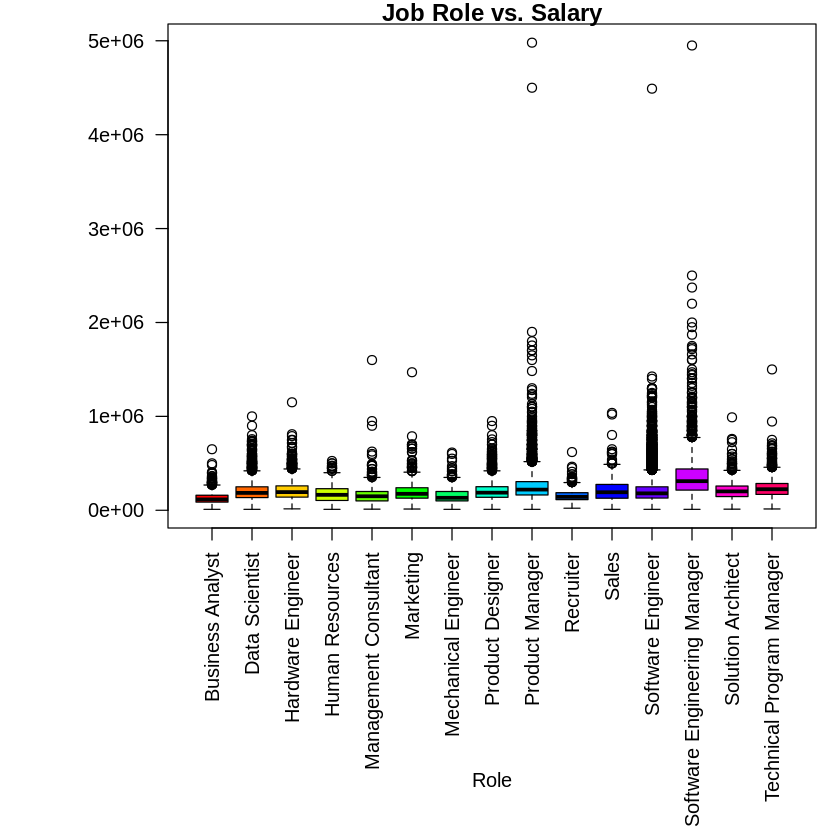

In [ ]:
par(mar=c(13,7,1,1), mgp = c(10, 1, 0))

#Salary and Job Roles
boxplot(totalyearlycompensation ~ title, ds2, col=rainbow(15) , ylab="Salary" , 
    xlab="Role", las = 2, main="Job Role vs. Salary")

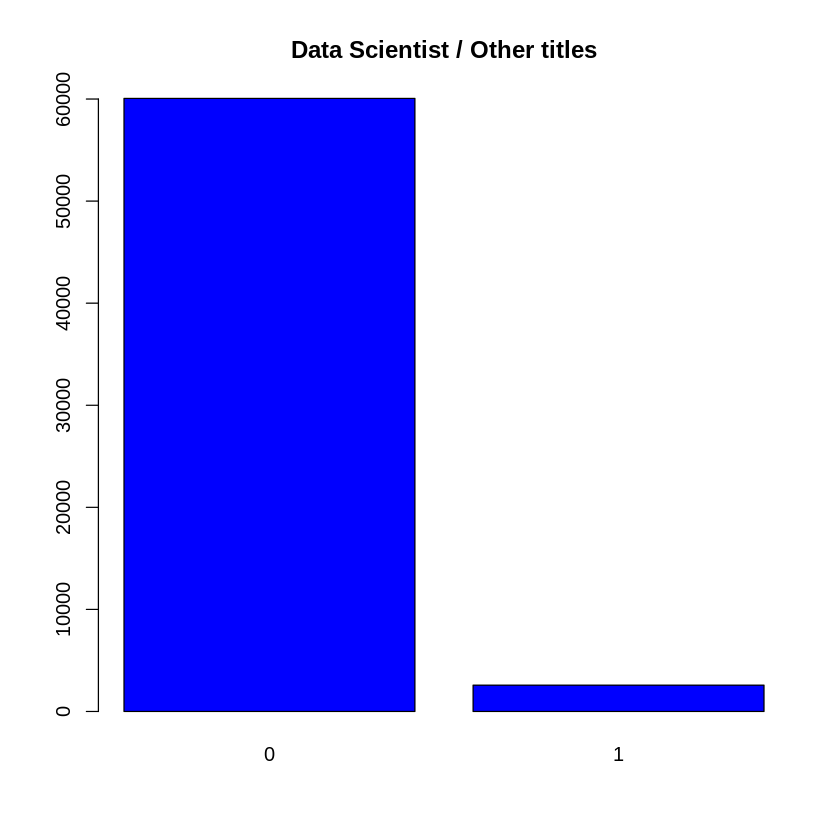

In [ ]:
# Create new variable "Scientist"
# 1: Data Scientists, 0: Other STEM titles
ds2$Data_Scientist <- as.factor(ifelse(ds2$title == "Data Scientist", 1, 0))

# Graph
barplot(table(ds2$Data_Scientist),col="blue", main="Data Scientist / Other titles")

One of our objectives for this research is that comparing the pay of data scientists versus that of other similar roles in STEM. We classify the values into "Data Scientists" and "Other STEM Titles", and create a dummy variable "Data_Scientist" (Data Scientist:1, Other tiles:0).

2-3. yearsofexperience

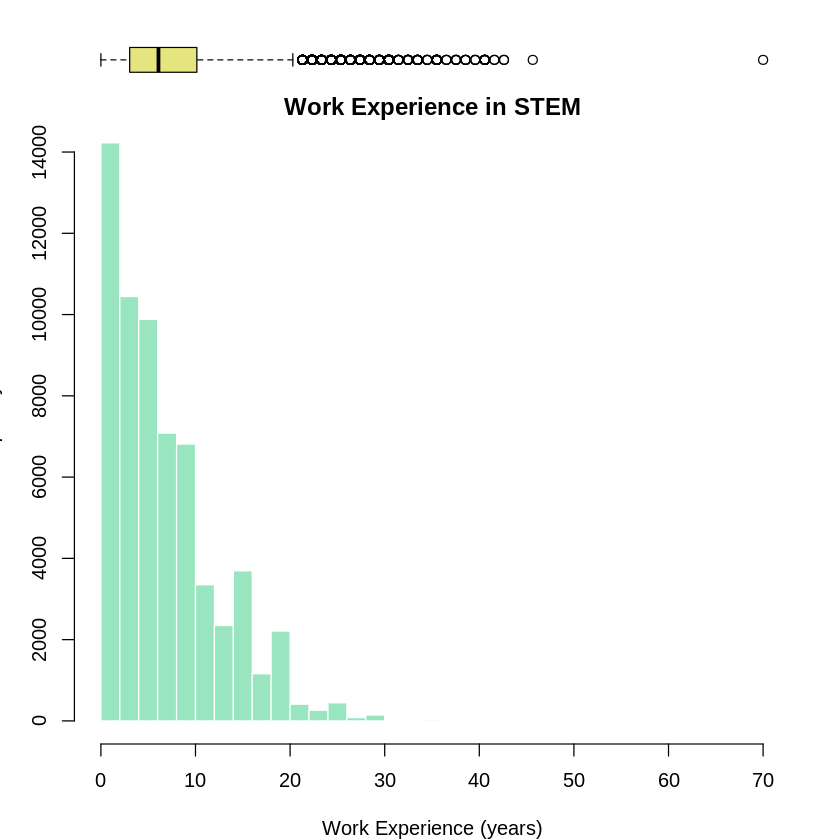

In [ ]:
#### yearsofexperience
#Graphh
# Layout to split the screen
layout(mat = matrix(c(1,2),2,1, byrow=TRUE),  height = c(1,8))
 
# Draw the boxplot and the histogram 
par(mar=c(0, 3.1, 1.1, 2.1))
boxplot(ds2$yearsofexperience , horizontal=TRUE , xaxt="n" , col=rgb(0.8,0.8,0,0.5) , frame=F)
par(mar=c(4, 3.1, 1.1, 2.1))
hist(ds2$yearsofexperience , breaks=40 , col=rgb(0.2,0.8,0.5,0.5) , border=F , main="Work Experience in STEM" , xlab="Work Experience (years)")

There are a lot of people with less than a year of experience and it seems to trend downwards from there, with occasional spikes at the 10, 15, and 20 year mark. 

2-4. Education/Bachelors_Degree/Masters_Degree/Doctorate_Degree/Highschool/Some_College

In [ ]:
#### Education
# Table
summarise(group_by(ds2, Education), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))

Education,CNT,%
<chr>,<int>,<dbl>
NA,32272,51.5
Master's Degree,15391,24.6
Bachelor's Degree,12601,20.1
PhD,1703,2.7
Some College,355,0.6
Highschool,320,0.5


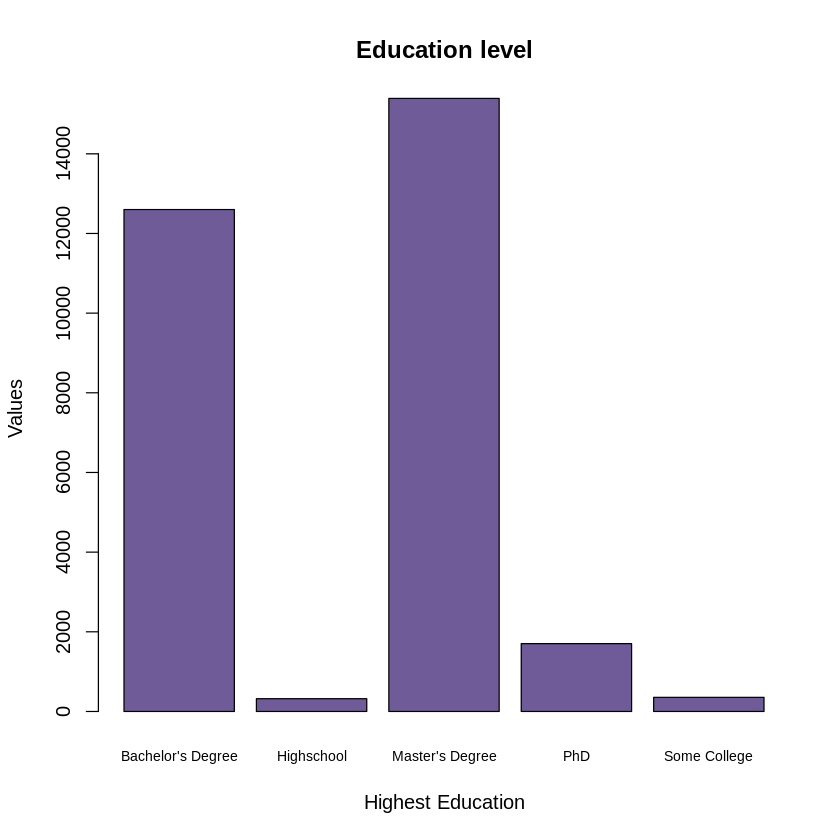

In [ ]:
# Graph
EdLevel <- ds2 %>% count(Education) %>% arrange(Education)
EdLevel <- EdLevel[!is.na(EdLevel$Education),]
barplot(height=EdLevel$n, names=EdLevel$Education, 
        col=rgb(0.3,0.2,0.5,0.8),
        xlab="Highest Education", 
        ylab="Values", 
        main="Education level",
        cex.names = 0.7)

We have six possible values (Master's Degree, Bachelor's Degree, PhD, Highschool, Some College, and NA (NA means unknown) for Education. We will remove that NA completely as it won't be statistically significant either way. "Masters_Degree", "Bachelors_Degree" "Doctorate_Degree", "Highschool", and "Some_College" are the indicator variables which is created from "Education". Hence, we use those 5 indicator variables instead of the Education column to create a model.


2-5. Race/Race_White/Race_Two_Or_More/Race_Black/Race_Hispanic

In [ ]:
#### Race
# Table
summarise(group_by(ds2, Race), CNT=n(), "%"=round(n()/nrow(ds2)*100,1))

Race,CNT,%
<chr>,<int>,<dbl>
Asian,11772,18.8
Black,690,1.1
Hispanic,1129,1.8
Two Or More,804,1.3
White,8032,12.8
NA,40215,64.2


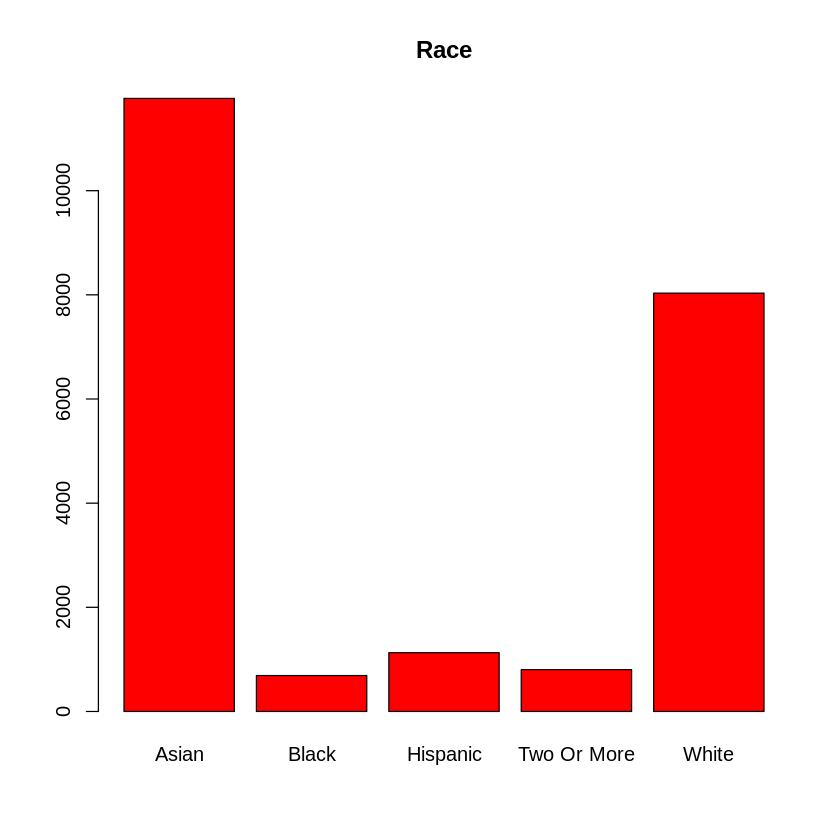

In [ ]:
# Graph
barplot(table(ds2$Race),col="red", main="Race")

We have six possible values (Asian, Black, Hispanic, Two Or More, White, and NA (NA means unknown) for Race. "Race_Asian", "Race_White" "Race_Two_Or_More", "Race_Black", and "Race_Hispanic" are the indicator variables which is created from "Race". Again, we will remove that NA completely as it won't be statistically significant for us with that sample size. Hence, we use the indicator variables instead of the Race column to create a model.

2-6. gender

In [ ]:
#### gender
# Table
summarise(group_by(ds2, gender), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))

gender,CNT,%
<chr>,<int>,<dbl>
Male,35702,57.0
NA,19540,31.2
Female,6999,11.2
Other,400,0.6
Title: Senior Software Engineer,1,0.0


gender,CNT,%
<chr>,<int>,<dbl>
Male,35702,83.6
Female,6999,16.4


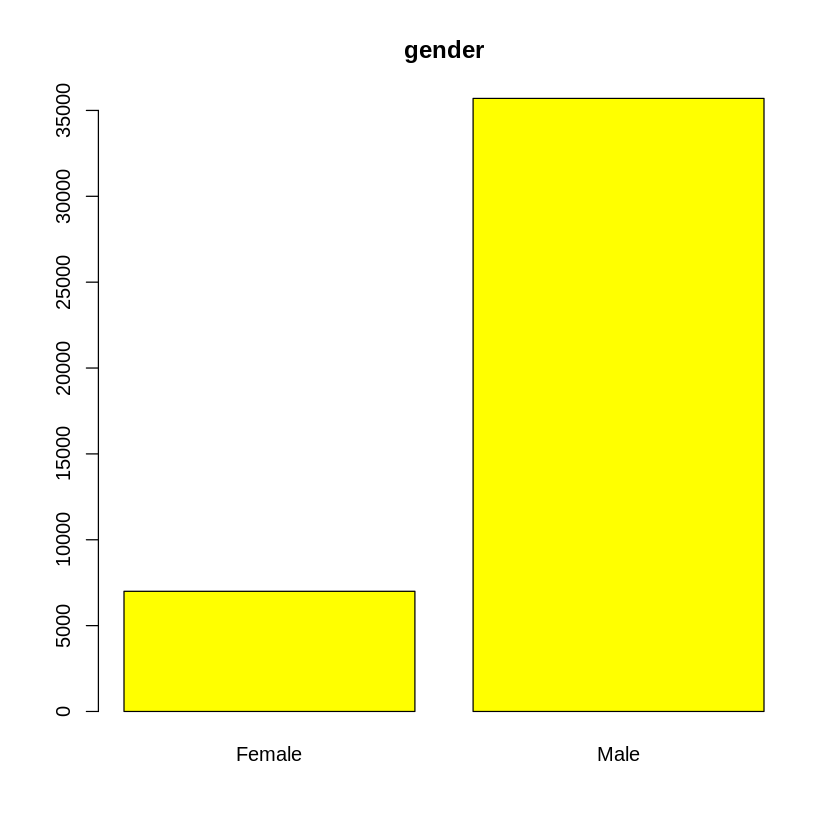

In [ ]:
### gender
# Transformation
# We use only the rows which contains Female or Male in "gender".
ds2 <- ds2 %>% filter(gender=='Male' | gender=='Female')

#### gender
# Table
summarise(group_by(ds2, gender), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT))

#### gender
# Graph
barplot(table(ds2$gender),col="yellow", main="gender")

Male: 83.6%, Female: 16.4%<br>

We will use only the rows which contains Female or Male in "gender". There seems to be a lot more male working in the industry compared to female. This is to be expected as men seem to pursue STEM majors in university a lot more compared to women.




**3. Other Columns**

3-1. level

In [ ]:
#### level
# Table
head(summarise(group_by(ds2, level), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT)))

level,CNT,%
<chr>,<int>,<dbl>
L4,3418,8.0
L5,3341,7.8
L3,2278,5.3
L6,1798,4.2
Senior Software Engineer,984,2.3
L2,816,1.9


In [ ]:
unique(ds2$level)
length(unique(ds2$level))

[1] "Senior"                                                
   [2] "L5"                                                    
   [3] "60"                                                    
   [4] "L6"                                                    
   [5] "L3"                                                    
   [6] "62"                                                    
   [7] "IC-4"                                                  
   [8] "ICT 3"                                                 
   [9] "L4"                                                    
  [10] "ICT4"                                                  
  [11] "2"                                                     
  [12] "L5 / SDE2"                                             
  [13] "E3"                                                    
  [14] "Staff"                                                 
  [15] "SDEII"                                                 
  [16] "L7"                                                    
  [17] "L6 - SDE3 - Senior Engineer"                           
  [18] "IC6"                                                   
  [19] "64"                                                    
  [20] "SE1"                                                   
  [21] "5"                                                     
  [22] "Senior Product Manager"                                
  [23] "MTS"                                                   
  [24] "Senior Director - I Band"                              
  [25] "Mid"                                                   
  [26] "Principal engineer"                                    
  [27] "Staff (Grade 8)"                                       
  [28] "ICT 2"                                                 
  [29] "L66"                                                   
  [30] "6"                                                     
  [31] "16"                                                    
  [32] "63"                                                    
  [33] "E6"                                                    
  [34] "59"                                                    
  [35] "67"                                                    
  [36] "Sr MTS"                                                
  [37] "SE2"                                                   
  [38] "ICT3"                                                  
  [39] "Software Engineer"                                     
  [40] "61"                                                    
  [41] "Senior manager"                                        
  [42] "Senior Software Engineer"                              
  [43] "65"                                                    
  [44] "IC4"                                                   
  [45] "Grade 7"                                               
  [46] "SWE 2"                                                 
  [47] "ICT-4"                                                 
  [48] "66"                                                    
  [49] "Senior Software Engineer P4"                           
  [50] "L60"                                                   
  [51] "G6"                                                    
  [52] "Senior Engineer"                                       
  [53] "Senior SW QA"                                          
  [54] "Senior Developer"                                      
  [55] "l7"                                                    
  [56] "Group Product Manager"                                 
  [57] "SDE 2 / 61"                                            
  [58] "L20"                                                   
  [59] "G8"                                                    
  [60] "MTS 2"                                                 
  [61] "ICT2"                                                  
  [62] "Mid-grade (of Jr, Mid, Sr)"                            
  [63] "Software engineer"         

[1] 2332

The unique value of level account for 1603 and the level description seems not formalized and versatile among companies. While indicators such as L1 to L7, which is the majority, may be helpful, but when using this measure, it should be considered that the definition of level varies from one respondent to another. 

3-2. tag

In [ ]:
#### tag
# Table
head(summarise(group_by(ds2, tag), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT)))

tag,CNT,%
<chr>,<int>,<dbl>
Full Stack,7956,18.6
Distributed Systems (Back-End),7436,17.4
API Development (Back-End),4439,10.4
ML / AI,2779,6.5
Web Development (Front-End),2178,5.1
DevOps,1132,2.7


The column "tag" contains the 2621 unique variables. It is a time-consuming task to classify these values into some categories. Hence, we don't use this column to create a first model. Based on the result of the model, we may consider using this column later on. 

3-3. basesalary

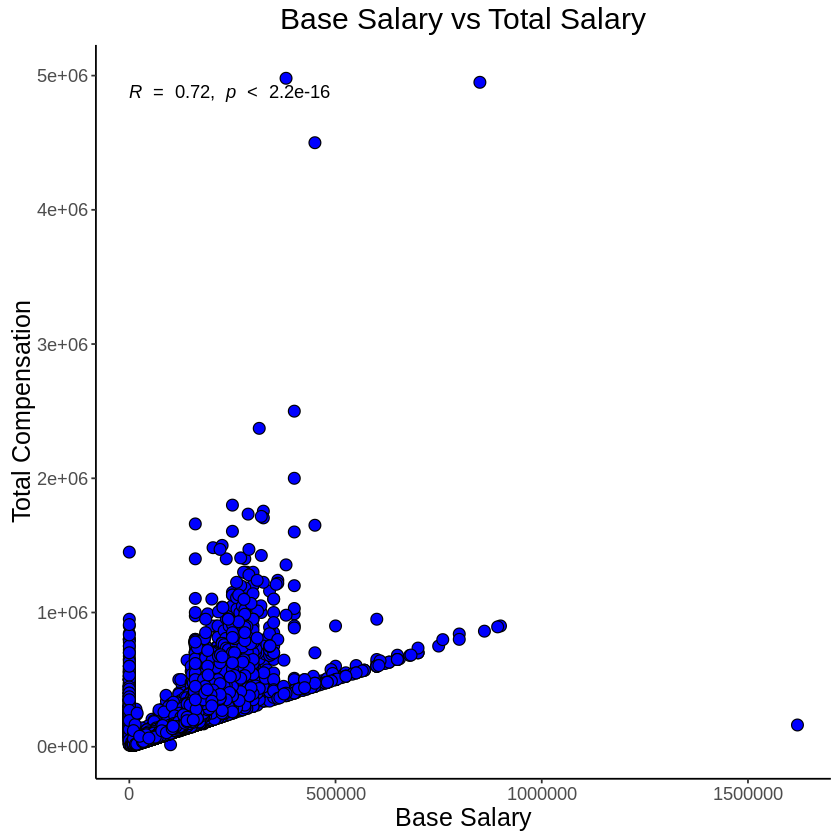

In [ ]:
#### basesalary
#Graph
ggplot(ds2, aes(x = basesalary, y = totalyearlycompensation)) + 
  geom_point(size = 3, shape = 21, color = "black", fill = "blue") + 
  stat_cor(r.accuracy = 0.01)+
  labs(y = "Total Compensation", x = "Base Salary", title = "Base Salary vs Total Salary") + 
  theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 18), 
                          axis.title = element_text(size = 15), 
                          axis.title.y = element_text(angle = 90, vjust = 0.5), 
                          axis.text = element_text(size = 11))

We shouldn't use this column as an independent variable since our dependent variable "totalyearlycompensation" probably includes basesalary. This is indicated by a strong pearson correlation of 0.82 which shows there is a strong relationship exissting between the two variables.

3-4. bonus

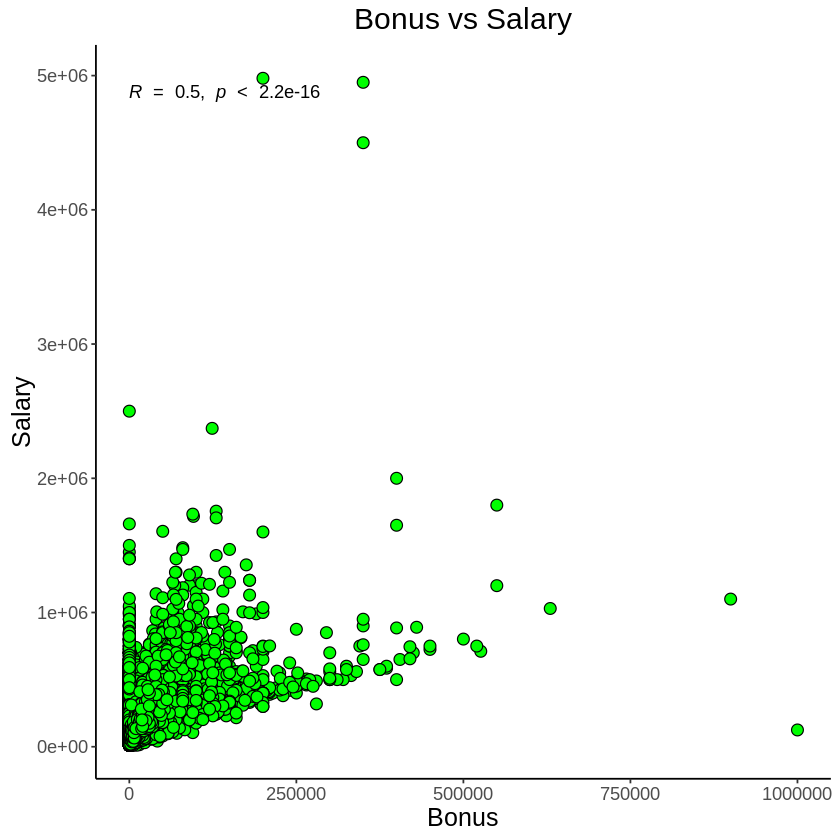

In [ ]:
#### bonus
#Graph
ggplot(ds2, aes(x = bonus, y = totalyearlycompensation)) + 
  geom_point(size = 3, shape = 21, color = "black", fill = "green") + 
  stat_cor(r.accuracy = 0.01)+
  labs(y = "Salary", x = "Bonus", title = "Bonus vs Salary") + 
  theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 18), 
                          axis.title = element_text(size = 15), 
                          axis.title.y = element_text(angle = 90, vjust = 0.5), 
                          axis.text = element_text(size = 11))

We shouldn't use this column as an independent variable since our dependent variable "totalyearlycompensation" probably includes bonus. This is indicated by the pearson correlation of 0.52 which shows there is some relationship existing between the two variables.

3-5. stockgrantvalue

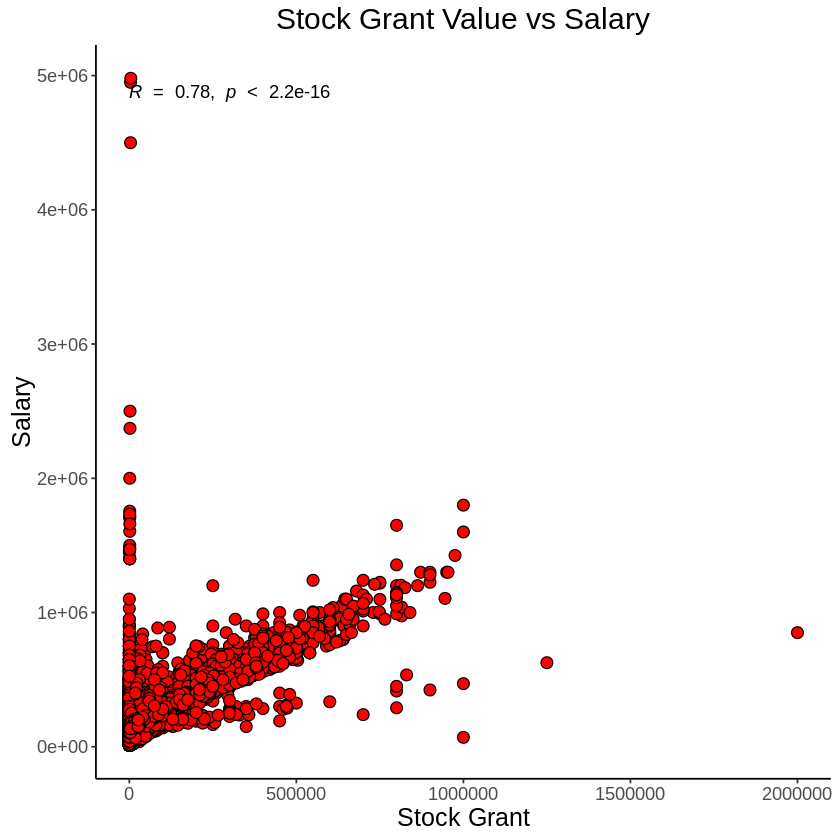

In [ ]:
#### stockgrantvalue
#Graph
ggplot(ds2, aes(x = stockgrantvalue, y = totalyearlycompensation)) + 
  geom_point(size = 3, shape = 21, color = "black", fill = "red") + 
  stat_cor(r.accuracy = 0.01)+
  labs(y = "Salary", x = "Stock Grant", title = "Stock Grant Value vs Salary") + 
  theme_classic() + theme(plot.title = element_text(hjust = 0.5, size = 18), 
                          axis.title = element_text(size = 15), 
                          axis.title.y = element_text(angle = 90, vjust = 0.5), 
                          axis.text = element_text(size = 11))

Most people aren't granted any stocks because the base salary includes most of the compensation, but there are companies that offer stock grant value as part of the salary. We shouldn't use this column as an independent variable since our dependent variable "totalyearlycompensation" probably includes stockgrantvalue. This is indicated by a strong pearson correlation of 0.87 which shows there is a strong relationship existing between the two variables.

3-6. location/cityid

In [ ]:
#### location
# Table
head(summarise(group_by(ds2, location), CNT=n(), "%"=round(n()/nrow(ds2)*100,1)) %>% arrange(desc(CNT)))

location,CNT,%
<chr>,<int>,<dbl>
"Seattle, WA",5767,13.5
"San Francisco, CA",4246,9.9
"New York, NY",3071,7.2
"Redmond, WA",1828,4.3
"Sunnyvale, CA",1516,3.6
"Mountain View, CA",1469,3.4


We won't use the column "cityid" to create a model. Instead, we may use the column "location". When we use that column, we would have to narrow down the values. For example, we'll convert the values into "Americas", "Europe", "Asia", "Oceania", "Africa", and "Unknown".


-------------------------------

# Model Building

Based off of our exploratory data analysis for dataset1, we hypothesize that “YearsCodePro”and “Edlevel” will likely impact salary the most. In general, having a Master’s degree is much more reputable than having a Bachelor's degree and employees will generally pay you more for the extra education you’ve received. Additionally, the more years of coding experience you have will likely translate directly into your work production and effectiveness which will also result in your employer granting you higher pay.

Because we have so many predictors and categorical variables, we are not sure about the linearity of our potential model which is why we will be running both linear regression and Classification and Regression Tree (CART) models (either simple trees or random forests). If we see multicollinearity in our predictors, then we  might choose to use CART models instead due to their ability to explain more complex relationships. Otherwise, a linear regression model will work perfectly.

For our linear model, we will not be tuning any hyperparameters as we are not looking to regularize our model with penalty terms (just a simple regression model). For our CART models, we will use the ‘caret’ package in R to create training and testing splits along with grid search to tune our hyper parameters. The model with the lowest validation error will be selected.

We expect that the higher your education, the more coding experience, and the larger your company, the higher you will get paid for your Data Scientist position. Our approaches mainly utilize the linear regression model to find suitable variables that can predict salary levels accurately. Coefficients for the linear regression model that are positive and significant at the 5% level will indicate that they have a positive correlation with salary. On the other hand, any negative coefficient that is significant at the 5% level will indicate that any increase in its respective factor will cause salary to decrease. 


-------------------------------

## Model Building - Dataset 1: How much do data scientists earn in 2017-2020?<br>
###Linear Regression (using all variables)

- Adjusted R-squared:  0.167
- AIC:  438,767
- RMSE: 42,228
- MAE:  30,783

###Linear Regression (using LASSO for variable selection)  <font color='red'>*Best Model</font>

- Adjusted R-squared:  0.166
- AIC:  438,766
- RMSE: 42,211
- MAE:  30,779

###CART Model

- RMSE: 43,064
- MAE:  32,583


Because all our variables are categorical, we need to convert them from numeric into factors before we create our models. 

In [ ]:
ds1 <- ds1 %>%
    mutate(EdLevel_Bachelors = as.factor(ifelse(EdLevel=="Bachelors",1,0))) %>%
    mutate(EdLevel_Masters = as.factor(ifelse(EdLevel=="Masters",1,0))) %>%
    mutate(EdLevel_Doctoral = as.factor(ifelse(EdLevel=="Doctoral",1,0))) %>%
    mutate(EdLevel_Professional = as.factor(ifelse(EdLevel=="Professional",1,0))) %>%
    mutate(EdLevel_Associate = as.factor(ifelse(EdLevel=="Associate",1,0))) %>%
    mutate(OrgSize_Solo = as.factor(ifelse(OrgSize=="Solo",1, 0))) %>%
    mutate(OrgSize_Small = as.factor(ifelse(OrgSize=="Small(2-99)",1, 0))) %>%
    mutate(OrgSize_Medium = as.factor(ifelse(OrgSize=="Medium(100-999)",1, 0))) %>%
    mutate(OrgSize_Large = as.factor(ifelse(OrgSize=="Large(1000+)",1, 0))) %>%
    mutate(UndergradMajor_CS = as.factor(ifelse(UndergradMajor=="CS",1, 0))) %>%
    mutate(UndergradMajor_WebDev = as.factor(ifelse(UndergradMajor=="Web Dev",1, 0))) %>%
    mutate(UndergradMajor_Engineering = as.factor(ifelse(UndergradMajor=="Engineering",1, 0))) %>%
    mutate(UndergradMajor_OtherSciences = as.factor(ifelse(UndergradMajor=="Other Sciences",1, 0))) %>%
    mutate(UndergradMajor_InformationSystems = as.factor(ifelse(UndergradMajor=="Information systems",1, 0))) %>%
    mutate(UndergradMajor_Humanities = as.factor(ifelse(UndergradMajor=="Humanities",1, 0))) %>%
    mutate(UndergradMajor_Business = as.factor(ifelse(UndergradMajor=="Business",1, 0))) %>%
    mutate(UndergradMajor_MathStats = as.factor(ifelse(UndergradMajor=="Math/Stats",1, 0))) %>%
    mutate(UndergradMajor_Arts = as.factor(ifelse(UndergradMajor=="Arts",1, 0))) %>%
    mutate(Employed_fulltime = as.factor(ifelse(Employment=="Employed full-time",1,0))) %>%
    mutate(Employed_parttime = as.factor(ifelse(Employment=="Employed part-time",1,0)))

ds1$`Data Scientist` = as.factor(ds1$`Data Scientist`)
ds1$`DB Administrator` = as.factor(ds1$`DB Administrator`)
ds1$`Data Analyst` = as.factor(ds1$`Data Analyst`)
ds1$`Data Engineer` = as.factor(ds1$`Data Engineer`)

# Copy data with necessary colulmns
Tds1 <- ds1 %>% select(-Year, -Country, -EdLevel, -UndergradMajor, -OrgSize, -Employment, -positions, -YearsCodeCat)

In [ ]:
str(Tds1)

'data.frame':	22761 obs. of  28 variables:
 $ Hobbyist                         : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ ConvertedComp                    : num  43750 51282 100000 27000 120000 ...
 $ JobSat                           : num  4 10 5 7 10 4 8 10 1 8 ...
 $ YearsCodePro                     : int  2 3 15 5 5 10 9 16 3 16 ...
 $ Data Scientist                   : Factor w/ 2 levels "0","1": 2 2 1 1 1 1 1 1 1 1 ...
 $ DB Administrator                 : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ Data Analyst                     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Data Engineer                    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ EdLevel_Bachelors                : Factor w/ 2 levels "0","1": 2 1 1 1 2 2 1 1 1 1 ...
 $ EdLevel_Masters                  : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 1 2 ...
 $ EdLevel_Doctoral                 : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ EdLevel_Professional             

For our first model, we will run linear regression using all the variables. This will serve as our benchmark for future models that we create. Additionally, we will create a train test split of 8 to 2 meaning 80% training data and 20% testing data using the caret package in R.

In [ ]:
##############################
### Split the dataset
##############################
# Split the data into "Training" and "Testing".
# Training : Testing = 8 : 2
set.seed(123)

colnames(Tds1) <- make.names(colnames(Tds1))
index = createDataPartition(y=Tds1$ConvertedComp, p=0.8, list=FALSE)

Tds1_train = Tds1[index,]
Tds1_test = Tds1[-index,]

The model summary tells us that there are many variables that aren't statistically significant. There can be many reasons that can cause this:
1. The independent variables are actually bad variables and don't explain the dependent variable at all.
2. Variables show multicollinearity and is affecting our interpretation and our results. 
3. There are outliers affecting our results. 

We will need to run tests to check for these.





In [ ]:
##############################
# Create a Linear-Linear model
##############################
Tds1_model <- lm(ConvertedComp	~ . , data=Tds1_train)
summary(Tds1_model)


Call:
lm(formula = ConvertedComp ~ ., data = Tds1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-114950  -27149   -7955   18724  254421 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         51479.60    3510.94  14.663  < 2e-16 ***
HobbyistYes                          2399.89     791.43   3.032 0.002430 ** 
JobSat                               1727.07     161.38  10.702  < 2e-16 ***
YearsCodePro                         2072.77      42.92  48.289  < 2e-16 ***
Data.Scientist1                      5727.11     795.60   7.198 6.33e-13 ***
DB.Administrator1                   -3926.11     786.02  -4.995 5.94e-07 ***
Data.Analyst1                       -3825.31     705.82  -5.420 6.05e-08 ***
Data.Engineer1                      11093.79     821.45  13.505  < 2e-16 ***
EdLevel_Bachelors1                   6843.86     951.56   7.192 6.62e-13 ***
EdLevel_Masters1                      353.43    1032.68   0.342

Before we check up on outliers and multicollinearity, we have some metrics to evaluate our models on:
1. Akaike Information Criterion (AIC): Mathematical model for evaluating how well a model fits the data it was generated from
2. Root Mean Squared Error (RMSE): A common general purpose metric for numerical predictions; calculated the average of the squared of all errors
3. Mean Absolute Error (MAE): Another common general purpose metric for numerical predictions that calculates the average of the absolute value of all errors.

In general, we will want to use RMSE over MAE because in linear regression, we are mostly measuring the errors in euclidean distance. From a loss function perspective, RMSE is better minimized if you look at its shape in 3D while MAE has less of a minimizable shape. However, we will still use MAE as a secondary metric for evaluation.

In [ ]:
##############################
# Some measues
##############################
Tds1_train$rst <- predict(Tds1_model, Tds1_train)
cat("AIC:")
AIC(Tds1_model)

AIC:

[1] 438759.8

In [ ]:
#training error
cat("RMSE:")
rmse(Tds1_train$ConvertedComp	, Tds1_train$rst)
cat("MAE:")
mae (Tds1_train$ConvertedComp	, Tds1_train$rst)

RMSE:

[1] 41220.42

MAE:

[1] 30773.1

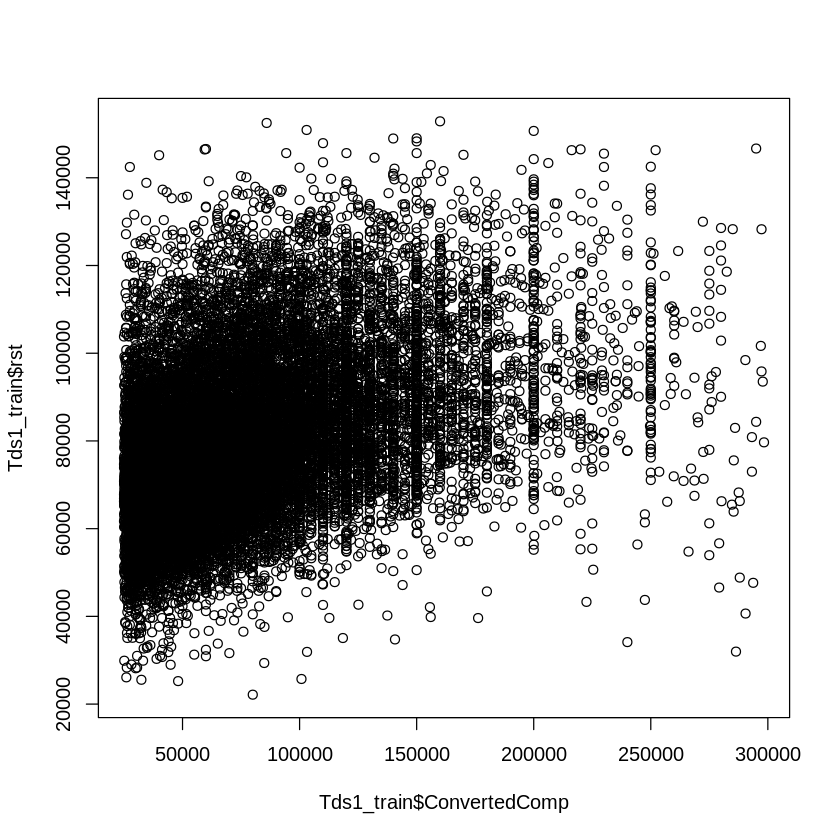

In [ ]:
plot(Tds1_train$ConvertedComp	, Tds1_train$rst)

The first thing we need to check for is outliers and we can utilize cooks distance to find them. Cook’s Distance is an estimate of the influence of a data point is a summary of how much a regression model changes when the ith observation is removed. A data point that has a large value for Cook’s Distance indicates that it strongly influences the fitted values. A general rule of thumb is that any point with a Cook’s Distance greater than 4/n (where n is the total number of data points) is considered to be an outlier.

[1] 18210

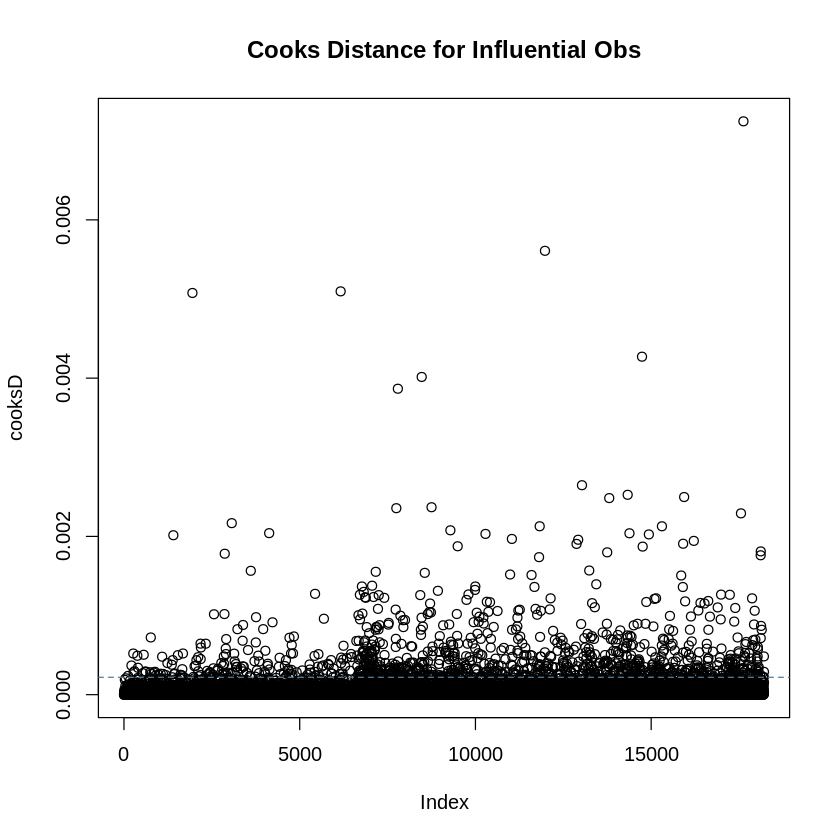

In [ ]:
# Check if removing outliers by cooked distance works for this model
cooksD <- cooks.distance(Tds1_model)
n <- nrow(Tds1_train)
n
plot(cooksD, main = "Cooks Distance for Influential Obs")
abline(h = 4/n, lty = 2, col = "steelblue") # add cutoff line (traditional threshold: 4/n)

In [ ]:
#identify influential points
influential_obs <- as.numeric(names(cooksD)[(cooksD > (4/n))])
influential_obs

[1]   149   272   337   349   382   491   513   683   717   779   793   962
 [13]   979   989  1093  1139  1163  1257  1338  1388  1419  1510  1578  1738
 [25]  1754  1775  1800  1825  1864  1966  2051  2057  2110  2116  2140  2463
 [37]  2498  2533  2580  2605  2672  2674  2694  2759  2765  2766  2773  2937
 [49]  2983  3012  3079  3080  3088  3094  3170  3198  3217  3326  3348  3463
 [61]  3491  3522  3544  3552  3561  3571  3584  3609  3615  3620  3626  3630
 [73]  3694  3795  3832  3855  3911  3930  3974  3980  4017  4019  4030  4153
 [85]  4211  4216  4223  4225  4250  4364  4401  4471  4477  4501  4632  4657
 [97]  4675  4683  4711  4755  4787  4794  4928  4975  5003  5008  5087  5093
[109]  5145  5155  5266  5493  5521  5551  5675  5704  5734  5740  5756  5817
[121]  5828  5867  5887  5915  5932  5943  5948  5968  5988  6019  6126  6319
[133]  6511  6577  6584  6597  6747  6748  6765  6776  6867  6884  6903  6921
[145]  6997  7043  7070  7220  7255  7338  7347  7365  7410  7432  7503  7647
[157]  7674  7689  7690  7741  7762  7768  7775  7836  7898  8015  8050  8070
[169]  8255  8286  8287  8320  8325  8334  8341  8349  8357  8378  8380  8385
[181]  8394  8402  8408  8417  8420  8449  8464  8465  8467  8468  8497  8499
[193]  8513  8514  8527  8555  8567  8570  8575  8585  8593  8626  8629  8633
[205]  8638  8643  8651  8652  8656  8660  8683  8687  8694  8708  8710  8719
[217]  8724  8734  8758  8759  8761  8767  8770  8783  8791  8794  8800  8809
[229]  8812  8813  8820  8823  8829  8835  8844  8852  8855  8865  8869  8894
[241]  8901  8909  8911  8930  8934  8938  8939  8940  8959  8964  8990  9004
[253]  9027  9043  9055  9056  9063  9084  9092  9099  9111  9120  9132  9138
[265]  9141  9148  9180  9215  9216  9233  9259  9270  9294  9299  9349  9379
[277]  9386  9403  9419  9422  9449  9452  9455  9466  9511  9553  9566  9579
[289]  9642  9651  9657  9658  9664  9665  9668  9672  9681  9687  9737  9742
[301]  9762  9765  9786  9798  9812  9824  9839  9855  9864  9878  9890  9915
[313]  9921  9936  9940  9993 10029 10049 10062 10063 10102 10103 10174 10181
[325] 10222 10248 10249 10263 10290 10293 10304 10345 10414 10432 10489 10520
[337] 10525 10572 10586 10596 10597 10602 10619 10624 10635 10658 10660 10662
[349] 10666 10697 10714 10725 10727 10758 10796 10829 10831 10834 10841 10851
[361] 10883 10884 10905 10936 10938 10944 10958 10960 10985 10993 10995 10999
[373] 11003 11129 11134 11175 11202 11213 11227 11230 11234 11238 11242 11294
[385] 11340 11355 11370 11421 11447 11448 11451 11474 11483 11495 11539 11563
[397] 11564 11566 11571 11577 11610 11611 11637 11638 11655 11658 11670 11700
[409] 11722 11724 11735 11739 11755 11771 11773 11783 11850 11856 11860 11879
[421] 11883 11885 11888 11889 11894 11895 11939 11971 12038 12046 12070 12074
[433] 12096 12158 12173 12178 12184 12196 12201 12208 12209 12239 12276 12319
[445] 12323 12360 12413 12432 12435 12466 12515 12517 12521 12526 12545 12573
[457] 12578 12580 12597 12599 12630 12638 12659 12701 12704 12711 12758 12759
[469] 12760 12803 12813 12837 12842 12850 12875 12882 12910 12917 12927 12954
[481] 12984 13016 13022 13040 13063 13065 13074 13095 13096 13110 13166 13190
[493] 13200 13236 13243 13297 13304 13313 13336 13409 13438 13441 13450 13479
[505] 13526 13575 13579 13636 13750 13768 13789 13820 13825 13835 13842 13843
[517] 13889 13923 13945 13959 13967 14008 14012 14016 14030 14040 14044 14048
[529] 14098 14114 14170 14177 14178 14182 14243 14247 14253 14282 14289 14292
[541] 14301 14315 14320 14353 14361 14449 14494 14500 14502 14569 14604 14619
[553] 14640 14684 14686 14690 14695 14709 14732 14754 14762 14772 14781 14784
[565] 14799 14811 14813 14824 14831 14836 14919 14963 14965 14999 15012 15020
[577] 15066 15083 15092 15113 15136 15160 15168 15184 15189 15226 15251 15260
[589] 15323 15333 15411 15417 15427 15458 15525 15528 15539 15549 15610 15624
[601] 15626 15653 15689 15695 15714 15717 15728 15752 15771 15795 15798 15816
[613] 15838 15875 15901 

In [ ]:
# Omit outliers with removing influential points removed
Tds1_train <- Tds1_train[-influential_obs, ]

The second thing we need to check for is multicollinearity. Multicollinearity is when your independent variables are linearly related in some ways. This can really skew your results and undermine the statistical significance of a variable. We can look at the Variance Inflation Factor (VIF) to detect multicollinearity which regresses every predictor with every other predictor in our dataset and looks for linear relationship. Any value greater than 5 exhibits strong multicollinearity and we should consider removing it. In other words, we can tell that our model above isn't great because there are many variables that have a VIF of greater than 5. 

In [ ]:
vif(Tds1_model)

Hobbyist                            JobSat 
                         1.014084                          1.014077 
                     YearsCodePro                    Data.Scientist 
                         1.091235                          1.526987 
                 DB.Administrator                      Data.Analyst 
                         1.652414                          1.118681 
                    Data.Engineer                 EdLevel_Bachelors 
                         1.132763                          2.371162 
                  EdLevel_Masters                  EdLevel_Doctoral 
                         2.427462                          1.691804 
             EdLevel_Professional                 EdLevel_Associate 
                         1.068537                          1.194558 
                     OrgSize_Solo                     OrgSize_Small 
                         1.605728                          8.435870 
                   OrgSize_Medium                     OrgSize_Large 
                         6.788533                          8.016048 
                UndergradMajor_CS             UndergradMajor_WebDev 
                        21.123381                          2.744844 
       UndergradMajor_Engineering      UndergradMajor_OtherSciences 
                         8.158607                          9.429078 
UndergradMajor_InformationSystems         UndergradMajor_Humanities 
                         6.277636                          3.033089 
          UndergradMajor_Business          UndergradMajor_MathStats 
                         3.860188                          6.587845 
              UndergradMajor_Arts                 Employed_fulltime 
                         2.109894                          2.437769 
                Employed_parttime 
                         1.457995

In order to narrow down our variable selection, we will utilize the Least Absolute Shrinkage and Selection operator (LASSO) method. LASSO is a regression analysis method that utilizes regularization. Regularization methods add constraints to a standard regreesion equation which penalizes large models for having too many predictors. The LASSO uses the absolute value penalty to make sure coefficients are below a certain threshold. In front of the penalty function is a hyperparameter alpha that we can optimize by using a 10-fold cross validation. The larger our hyperparameter alpha, the stronger the penalty.

In [ ]:
##############################
### For LASSO model 
##############################
# Split the data into "Training" and "Testing".
# Training : Testing = 8 : 2
# fit the model
set.seed(123)

Tds1_train <- Tds1_train[,colnames(Tds1_train) != "rst"]

x = data.matrix(Tds1_train[,colnames(Tds1_train) != "ConvertedComp"])
cv_lasso = cv.glmnet(x=x, y=Tds1_train$ConvertedComp, alpha=1, standardize = TRUE)

#find optimal lambda value that minimizes test MSE
best_lambda <- cv_lasso$lambda.min
best_lambda

[1] 72.37383

Our cross validation finds that a lambda of 79.397 gives us the lowest validation MSE error. Now we can run the LASSO model again to look at how the coefficients were chosen and which variables were dropped. One of the reasons why LASSO is so popular is because of its power to select variables. If you look at the results below, our LASSO model has dropped two variables that it deems unnecessary for our model: "EdLevel_Masters", "OrgSize_Medium" and "UndergradMajor_OtherSciences". Let's run our new model without these variables to look at our evaluation metrics. 

In [ ]:
coef(cv_lasso, s=cv_lasso$lambda.min)

28 x 1 sparse Matrix of class "dgCMatrix"
                                           s1
(Intercept)                        66774.7425
Hobbyist                            2468.3713
JobSat                              1668.9412
YearsCodePro                        2055.0025
Data.Scientist                      5485.1600
DB.Administrator                   -3837.2608
Data.Analyst                       -3302.6362
Data.Engineer                      10958.0774
EdLevel_Bachelors                   6251.2938
EdLevel_Masters                        .     
EdLevel_Doctoral                    9431.9736
EdLevel_Professional              -14874.5299
EdLevel_Associate                   2219.3648
OrgSize_Solo                        -110.9438
OrgSize_Small                      -4955.4682
OrgSize_Medium                         .     
OrgSize_Large                       6495.4933
UndergradMajor_CS                  -4613.0210
UndergradMajor_WebDev             -10605.8066
UndergradMajor_Engineering         -23

In [ ]:
lasso_data <- Tds1_train[,!(colnames(Tds1_train) %in% c("EdLevel_Masters", "OrgSize_Solo", "OrgSize_Medium", "UndergradMajor_OtherSciences"))]
lasso_model <- lm(ConvertedComp~., data=lasso_data)
summary(lasso_model)


Call:
lm(formula = ConvertedComp ~ ., data = lasso_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-114597  -27162   -7878   18714  253888 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         50873.21    2082.52  24.429  < 2e-16 ***
HobbyistYes                          2655.34     807.73   3.287  0.00101 ** 
JobSat                               1701.17     164.28  10.355  < 2e-16 ***
YearsCodePro                         2066.57      43.71  47.276  < 2e-16 ***
Data.Scientist1                      5568.00     806.22   6.906 5.15e-12 ***
DB.Administrator1                   -3940.06     795.28  -4.954 7.33e-07 ***
Data.Analyst1                       -3541.14     720.46  -4.915 8.95e-07 ***
Data.Engineer1                      11147.37     839.49  13.279  < 2e-16 ***
EdLevel_Bachelors1                   6545.02     677.47   9.661  < 2e-16 ***
EdLevel_Doctoral1                    9603.85    1300.84   7.383

After dropping the 4 unnecessary variables, our model looks much cleaner and variables are much more statistically significant. Below we will also see that we no longer have multicollinearity existing in our model which is fantastic! Our new model with outliers removed and variables selected with LASSO is statistically more significant and has a lower MSE and MAE which is the result we wanted.  

In [ ]:
vif(lasso_model)

Hobbyist                            JobSat 
                         1.011011                          1.012986 
                     YearsCodePro                    Data.Scientist 
                         1.084494                          1.505159 
                 DB.Administrator                      Data.Analyst 
                         1.623428                          1.119411 
                    Data.Engineer                 EdLevel_Bachelors 
                         1.121272                          1.152465 
                 EdLevel_Doctoral              EdLevel_Professional 
                         1.204419                          1.017054 
                EdLevel_Associate                     OrgSize_Small 
                         1.065241                          1.498338 
                    OrgSize_Large                 UndergradMajor_CS 
                         1.532185                          2.663057 
            UndergradMajor_WebDev        UndergradMajor_Engineering 
                         1.204367                          1.634369 
UndergradMajor_InformationSystems         UndergradMajor_Humanities 
                         1.535475                          1.188137 
          UndergradMajor_Business          UndergradMajor_MathStats 
                         1.279378                          1.476372 
              UndergradMajor_Arts                 Employed_fulltime 
                         1.112828                          1.354748 
                Employed_parttime 
                         1.255252

In [ ]:
#training error for LASSO
lasso_data$rst <- predict(lasso_model, Tds1_train)
cat("AIC:")
AIC(Tds1_model)
cat("RMSE:")
rmse(Tds1_train$ConvertedComp	, lasso_data$rst)
cat("MAE:")
mae (Tds1_train$ConvertedComp	, lasso_data$rst)

AIC:

[1] 438759.8

RMSE:

[1] 41203.27

MAE:

[1] 30769.42

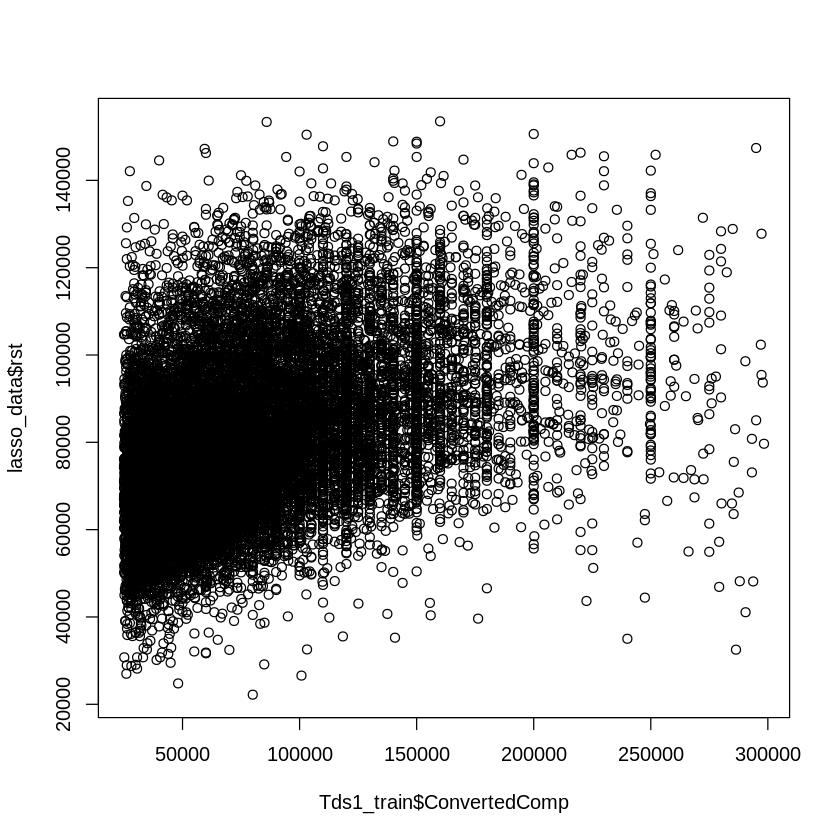

In [ ]:
plot(Tds1_train$ConvertedComp	, lasso_data$rst)

In addition to our linear regression models, we also wanted to use a CART model because tree models tend to be able to explain non-linear relationships more effectively. Again, we will utilize a 10-fold cross validation to choose our hyperparameters for our tree. The hyperparameter that we will be choosing is "cp" the complexity parameter which is the minimum improvement in the model needed at each node. If at each branching the added predictor doesn't improve the tree model, then the model will abandon the used variable. Note that this tree model also uses the dataset with outliers removed, but uses all the variables like our first linear regression model.

In [ ]:
##############################
### For CART model
##############################
# Split the data into "Training" and "Testing".
# Training : Testing = 8 : 2
# fit the model
set.seed(123)

Tds1_train <- Tds1_train[,colnames(Tds1_train) != "rst"]

ds1.tree <- train(ConvertedComp ~ ., 
                  data=Tds1_train, 
                  method="rpart", 
                  trControl = trainControl(method = "cv"))
print(ds1.tree)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


CART 

17461 samples
   27 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 15714, 15715, 15716, 15715, 15715, 15716, ... 
Resampling results across tuning parameters:

  cp           RMSE      Rsquared    MAE     
  0.009351925  42995.17  0.09382768  32523.32
  0.015309205  43274.53  0.08185230  32819.39
  0.075565844  44224.48  0.06772126  33739.24

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.009351925.


Our final tree model has only chosen 1 variable out of all our other variables which is YearsCodePro. Our evaluation metrics show us that our second model utilizing LASSO for variable selection is clearly much better. However, from the plot below, we can deduce that one's coding experience professionally is extremely important when it comes to determining the salary of data scientists. Based on the model: 

*   if you have less than 5.5 years of coding experience professionally, then you will make 62100 dollars
*   if you have more than 5.5 years, but less than 11.5 years of coding experience professionally, then you will make 79860 dollars
*   if you have more than 11.5 years of coding experience professionally, then you will make 98710 dollars

The biggest problem with this model is that it doesn't give a range of values and limits to salary to only the three values provided. There are other variables that can clearly impact salaries positively or negatively but our tree model is unable to capture that pattern.

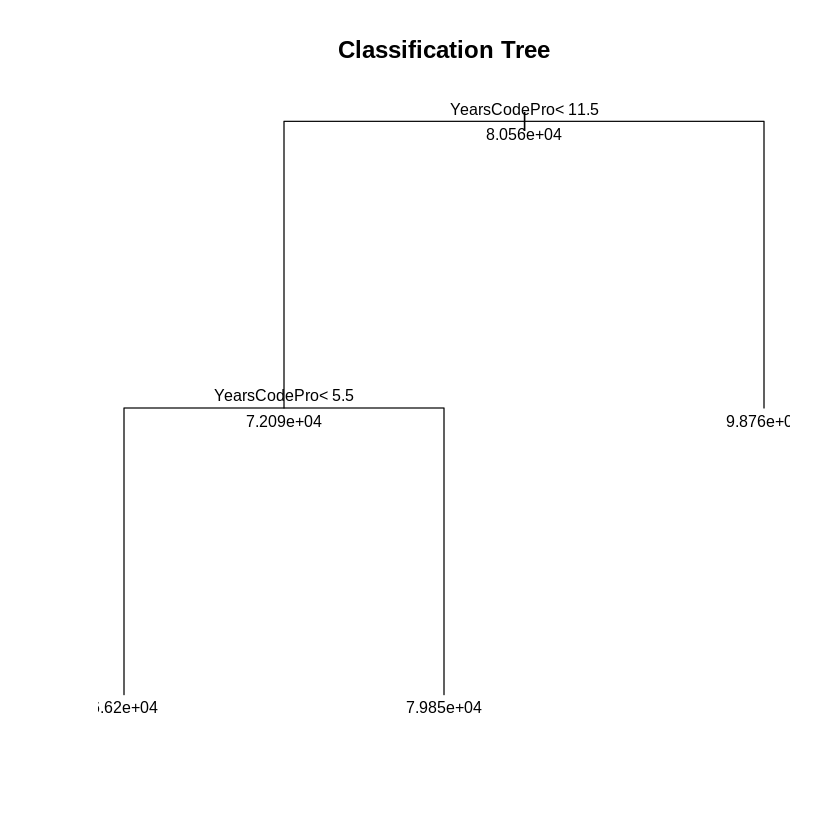

In [ ]:
# plot the model
plot(ds1.tree$finalModel, uniform=TRUE,
     main="Classification Tree")
text(ds1.tree$finalModel, all=TRUE, cex=.8)

In [ ]:
ds1.pred = predict(ds1.tree, Tds1_train)
cat("RMSE:")
rmse(Tds1_train$ConvertedComp, ds1.pred)
cat("MAE:")
mae(Tds1_train$ConvertedComp, ds1.pred)

RMSE:

[1] 43053.83

MAE:

[1] 32568.59


We have the validation error below for all 3 models. Even though the first regression model and second LASSO model have similar metrics, our second model has eliminated outliers and multicollinearity which means the results of our second model is more statistically significant and meaningful. 

In [ ]:
##############################
# Validate the models with "Testing" dataset
##############################

#first linear regression model
cat("Linear Regression Model\n")
Tds1_test$rst <- predict(Tds1_model, Tds1_test)
cat("RMSE:")
rmse(Tds1_test$ConvertedComp, Tds1_test$rst)
cat("MAE:")
mae (Tds1_test$ConvertedComp, Tds1_test$rst)
cat("\n")

#LASSO model
cat("LASSO Model\n")
Tds1_test$rst_lasso <- predict(lasso_model, Tds1_test)
cat("RMSE:")
rmse(Tds1_test$ConvertedComp, Tds1_test$rst_lasso)
cat("MAE:")
mae (Tds1_test$ConvertedComp, Tds1_test$rst_lasso)
cat("\n")

#CART model
cat("Regression Tree Model\n")
ds1.pred <- predict(ds1.tree, Tds1_test)
cat("RMSE:")
rmse(Tds1_test$ConvertedComp, ds1.pred)
cat("MAE:")
mae (Tds1_test$ConvertedComp, ds1.pred)
cat("\n")

Linear Regression Model
RMSE:

[1] 42207.38

MAE:

[1] 31538.51


LASSO Model
RMSE:

[1] 42206.92

MAE:

[1] 31552.73


Regression Tree Model
RMSE:

[1] 43623.67

MAE:

[1] 32918.64

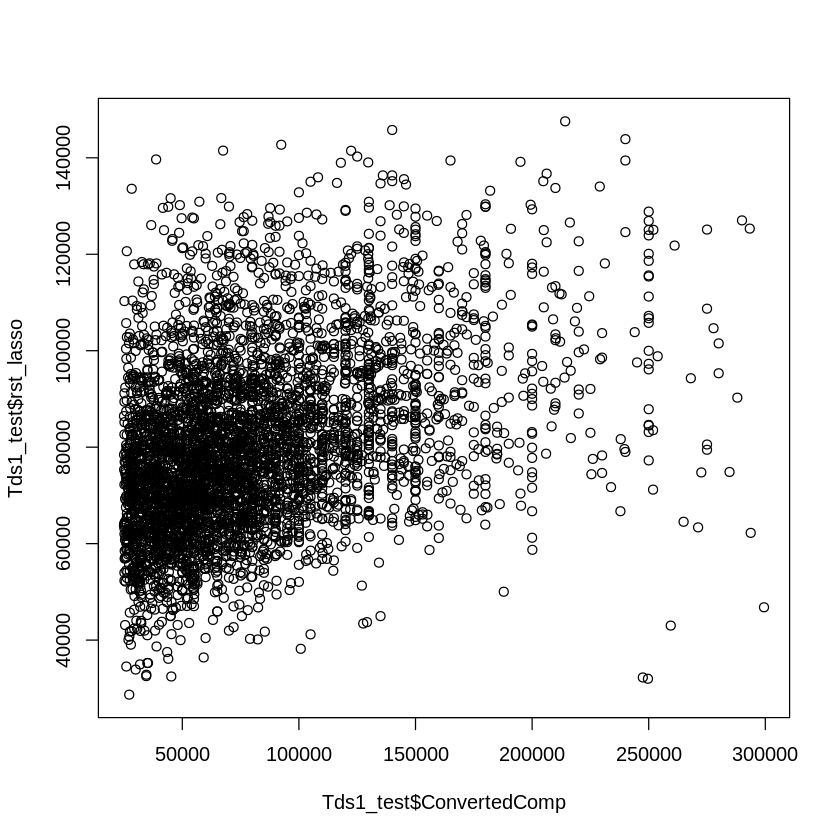

In [ ]:
plot(Tds1_test$ConvertedComp	, Tds1_test$rst_lasso)

Stargazer is a useful package to compare models with similar set of variables in side-by-side summary table format. Below table shows which variables are selected or not in LASSO model, and display the coefficients and statistic summary like Adjusted R-squared. The scores indicate the LASSO model keeps almost the same prediction capability as what the simple linear regression model has. 

As we expected, the variables YearsCodePro, Data Science jobs, EdLevel Doctoral are all important factors when predicting salary with positive coefficients along with JobSat and OrgSize Large. This has helped us confirm part of our hypothesis that the more coding experience and education one has, the higher one's pay at the data science position. 

Interestingly, DB Administrator and Analyst showed negative coefficients while Data Scientist and Data Engineers had positive coefficients. This shows that companies value the titles of Data Scientists and Data Engineers more than DB Administrators and Analysts because they are willing to pay more for them. People interested in a data related job should definitely look to pursue those 2 roles instead.

Likewise, both EdLevel_Professional and UndergradMajor_WebDev lower the compensation relatively with negative coefficients. Undergrad majors in Art, Humanities, Business, Math and Stats are more important factors in deciding salary than majors related in information science disciplines (computer science, engineering, information systems). All of these evidence suggest that the data science position requires not only informational coding abilities, but also liberal arts or social skills. Even an overwhelming amount of research or coding experience won't get you a high paying position without some crucial soft skills. 


In [ ]:
#################################
# Compare the models by stargazer
#################################
stargazer(Tds1_model, lasso_model, type = "text", 
          title            = "Model comparison for dataset 1",
          dep.var.labels   = "CovertedComp"
          )


Model comparison for dataset 1
                                                     Dependent variable:                  
                                   -------------------------------------------------------
                                                        CovertedComp                      
                                               (1)                         (2)            
------------------------------------------------------------------------------------------
HobbyistYes                               2,399.893***                2,655.337***        
                                            (791.428)                   (807.733)         
                                                                                          
JobSat                                    1,727.068***                1,701.170***        
                                            (161.379)                   (164.283)         
                                                          

## Model Building - Dataset2: Data Sciense and STEM Salaries<br>


###<b>0. Data Preparation</b>

We performed three data manipulation before creating a model. First, we created new dataset with the forowlling variables.<br> Second, we converted the character variables to the factor variables. Third, the rows which contain 'na' are removed from the dataset.<br>
&nbsp;&nbsp;&nbsp;&nbsp;-- Dependent variable: "totalyearlycompensation"<br>
&nbsp;&nbsp;&nbsp;&nbsp;-- Independent variable: "yearsofexperience", "FAANGM", "Data_Scientist", "Education" , "gender", and "Race".<br>

In [ ]:
##############################
### Remove NA rows
##############################
# Create new dataset
ds2_df <- select(ds2, totalyearlycompensation, yearsofexperience, FAANGM, Data_Scientist, Education ,gender, Race)

# Convert Character to Factor
ds2_df$Education <- as.factor(ds2_df$Education)
ds2_df$gender    <- as.factor(ds2_df$gender)
ds2_df$Race      <- as.factor(ds2_df$Race)

# Remove the rows which contain 'na'
ds2_df <- na.omit(ds2_df)

### <font>1. Model2-1 -- All Data / Linear-Linear model

We divided the dataset into training and validation sets. We create a model with the training dataset, and the model is used to predict the responses for the observations in the validation dataset. In this way, we can measure the model peformance and detect overfitting.

In [ ]:
##############################
### Split the dataset
##############################
# Split the data into "Training" and "Validation".
# Training : Validation = 8 : 2
ds2_df1 <- ds2_df
set.seed(6203)
ds2_df1_split <- initial_split(ds2_df1, prop = 0.8)
ds2_df1_split
ds2_df1_train <- training(ds2_df1_split)
ds2_df1_test  <- testing(ds2_df1_split)

<Training/Testing/Total>
<17188/4297/21485>

The following is our first model. We simply fit the linear-linear regression model with lm function and displaied the result with summry function. As we expected, "EducationMaster's Degree" and "EducationPhD" are important factors to predict salary. In this model, "yearsofexperience", "FAANGM1", "genderMale", "RaceTwo Or More", and "RaceWhite" are also statistically significant (95% confidence interval) .

In [ ]:
##############################
# Create a Linear-Linear model
##############################
ds2_model1 <- lm(totalyearlycompensation	~ . , data=ds2_df1_train)
summary(ds2_model1)


Call:
lm(formula = totalyearlycompensation ~ ., data = ds2_df1_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-376229  -60568  -14446   40872 4644457 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 93128       2604  35.757  < 2e-16 ***
yearsofexperience            8609        151  57.030  < 2e-16 ***
FAANGM1                     68313       1838  37.157  < 2e-16 ***
Data_Scientist1             -3338       4527  -0.737 0.460888    
EducationHighschool        -13011       7425  -1.752 0.079731 .  
EducationMaster's Degree    21366       1869  11.433  < 2e-16 ***
EducationPhD                89754       4486  20.005  < 2e-16 ***
EducationSome College        1675       6871   0.244 0.807435    
genderMale                   6377       2256   2.827 0.004710 ** 
RaceBlack                   -3229       5030  -0.642 0.520875    
RaceHispanic                -5439       4089  -1.330 0.183496    
RaceTwo Or More             

We calculated Variance Inflation Factor(VIF) to detect multicollinearity. Generally, VIF greater than "5" indicates potentially multicollinearity. Multicollinearity is not occured on the first model because all VIFs are less than "5".


In [ ]:
##############################
# Check multicollinearity
##############################
ds2_df1_train$salary_prd <- predict(ds2_model1, ds2_df1_train)

# Calculate VIF
cat("VIF:")
vif (ds2_model1)

VIF:

,GVIF,Df,GVIF^(1/(2*Df))
yearsofexperience,1.048917,1,1.024166
FAANGM,1.009555,1,1.004766
Data_Scientist,1.053304,1,1.026306
Education,1.160986,4,1.018834
gender,1.008920,1,1.004450
Race,1.106532,4,1.012734


We calculated AIC (Akaike information criterion), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error) to evaluate the model. The scatter plot below shows the comparison of actual salary and predicted salary. We can see that the predicted salary is very higher than the actual salary from this graph. In the Exploratory Data Analysis phase, it is found that the most people generally receive 100,000 to 300,000, and some receive more than 500,000 annually. This model seems to be affected by outliers. 

AIC:

[1] 448749.7

RMSE:

[1] 112916.5

MAE:

[1] 73012.23

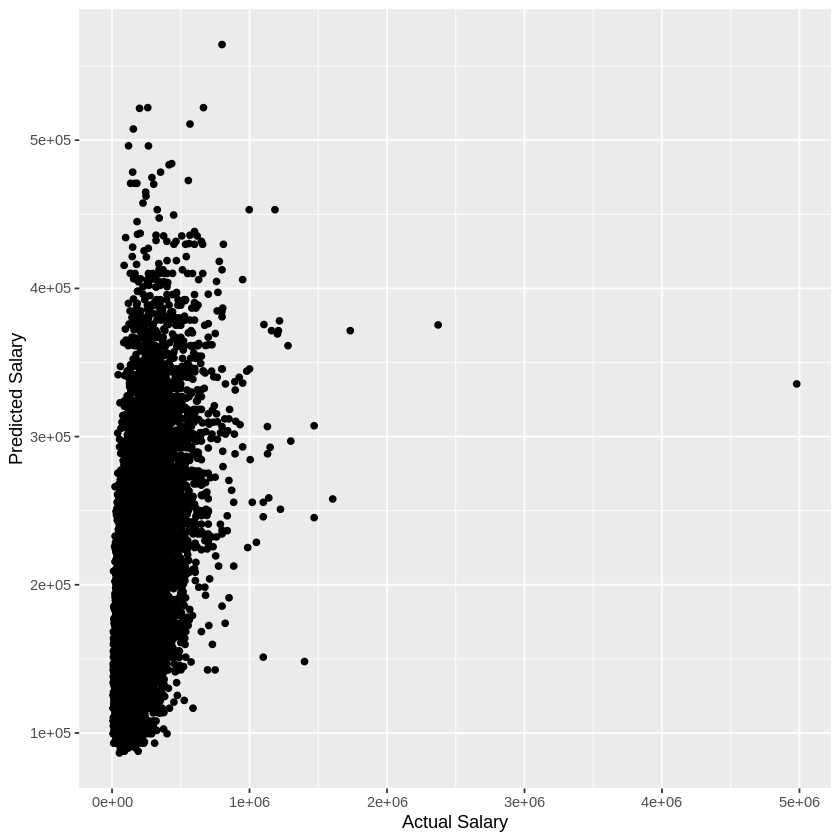

In [ ]:
##############################
# Model Evaluation
##############################
# Calculate AIC
cat("AIC:")
AIC(ds2_model1)

# Calculate RMSE
cat("RMSE:")
rmse(ds2_df1_train$totalyearlycompensation, ds2_df1_train$salary_prd)

# Calculate MAE
cat("MAE:")
mae (ds2_df1_train$totalyearlycompensation, ds2_df1_train$salary_prd)

# Plot actual salary and predicted salary
ggplot(ds2_df1_train, aes(x=totalyearlycompensation, y=salary_prd)) +
    geom_point() +
    xlab("Actual Salary") +
    ylab("Predicted Salary")

With the validation dataset, we predicted salary, calculate AIC/RMSE/MAE, and made a scatter plot. The tendency of the result of the validation data is the same as that of the result of the training data. No overfitting has occurred in this model.

RMSE:

[1] 123613.6

MAE:

[1] 73834.44

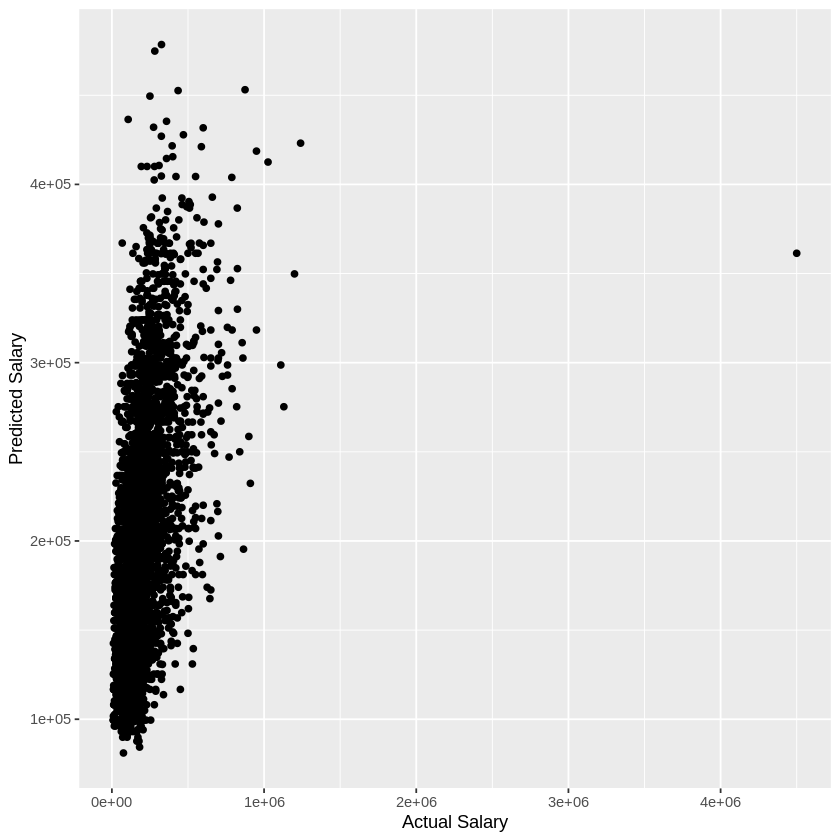

In [ ]:
##############################
# Varidate the model with "Validation" dataset
##############################
ds2_df1_test$salary_prd <- predict(ds2_model1, ds2_df1_test)
# Calculate RMSE
cat("RMSE:")
rmse(ds2_df1_test$totalyearlycompensation, ds2_df1_test$salary_prd)

# Calculate RMSE
cat("MAE:")
mae (ds2_df1_test$totalyearlycompensation, ds2_df1_test$salary_prd)

# Plot actual salary and predicted salary
ggplot(ds2_df1_test, aes(x=totalyearlycompensation, y=salary_prd)) +
    geom_point() +
    xlab("Actual Salary") +
    ylab("Predicted Salary")

### <font>2. Model2-2 -- All Data / Log-Linear model

We divided the dataset into training and validation sets. We create a model with the training dataset, and the model is used to predict the responses for the observations in the validation dataset. In this way, we can measure the model peformance and detect overfitting.

In [ ]:
##############################
### Split the dataset
##############################
# Split the data into "Training" and "Validation".
# Training : Validation = 8 : 2
ds2_df2 <- ds2_df
set.seed(6203)
ds2_df2_split <- initial_split(ds2_df2, prop = 0.8)
ds2_df2_split
ds2_df2_train <- training(ds2_df2_split)
ds2_df2_test  <- testing(ds2_df2_split)

<Training/Testing/Total>
<17188/4297/21485>

The following is our second model. We fit the log-linear regression model with lm function and displaied the result with summry function. 
Statistically significant (95% confidence interval) variables are slightly different from the first model.

In [ ]:
##############################
# Create a Log-Linear model
##############################
ds2_model2 <- lm(log(totalyearlycompensation)	~ . , data=ds2_df2_train)
summary(ds2_model2)


Call:
lm(formula = log(totalyearlycompensation) ~ ., data = ds2_df2_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.78084 -0.25515  0.04924  0.34130  2.73460 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              11.466789   0.012991 882.641  < 2e-16 ***
yearsofexperience         0.040050   0.000753  53.186  < 2e-16 ***
FAANGM1                   0.379316   0.009171  41.362  < 2e-16 ***
Data_Scientist1          -0.016731   0.022580  -0.741  0.45872    
EducationHighschool      -0.097193   0.037036  -2.624  0.00869 ** 
EducationMaster's Degree  0.179156   0.009322  19.219  < 2e-16 ***
EducationPhD              0.476410   0.022379  21.288  < 2e-16 ***
EducationSome College     0.043228   0.034271   1.261  0.20719    
genderMale               -0.019773   0.011253  -1.757  0.07892 .  
RaceBlack                 0.054628   0.025087   2.178  0.02946 *  
RaceHispanic              0.056704   0.020398   2.780  0.00544 ** 
R

We calculated Variance Inflation Factor(VIF) to detect multicollinearity. Generally, VIF greater than "5" indicates potentially multicollinearity. Multicollinearity is not ocured on the second model because all VIFs are less than "5".

In [ ]:
##############################
# Check multicollinearity
##############################
# Calculate VIF
cat("VIF:")
vif (ds2_model2)

VIF:

,GVIF,Df,GVIF^(1/(2*Df))
yearsofexperience,1.048917,1,1.024166
FAANGM,1.009555,1,1.004766
Data_Scientist,1.053304,1,1.026306
Education,1.160986,4,1.018834
gender,1.008920,1,1.004450
Race,1.106532,4,1.012734


We calculated AIC (Akaike information criterion), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error) to evaluate the model. The scatter plot below shows the comparison of actual salary and predicted salary. We can see that the predicted salary is very higher than the actual salary from this graph. The second model also seems to be affected by outliers like the first model.

AIC:

[1] 29071.75

RMSE:

[1] 235946.6

MAE:

[1] 196698.4

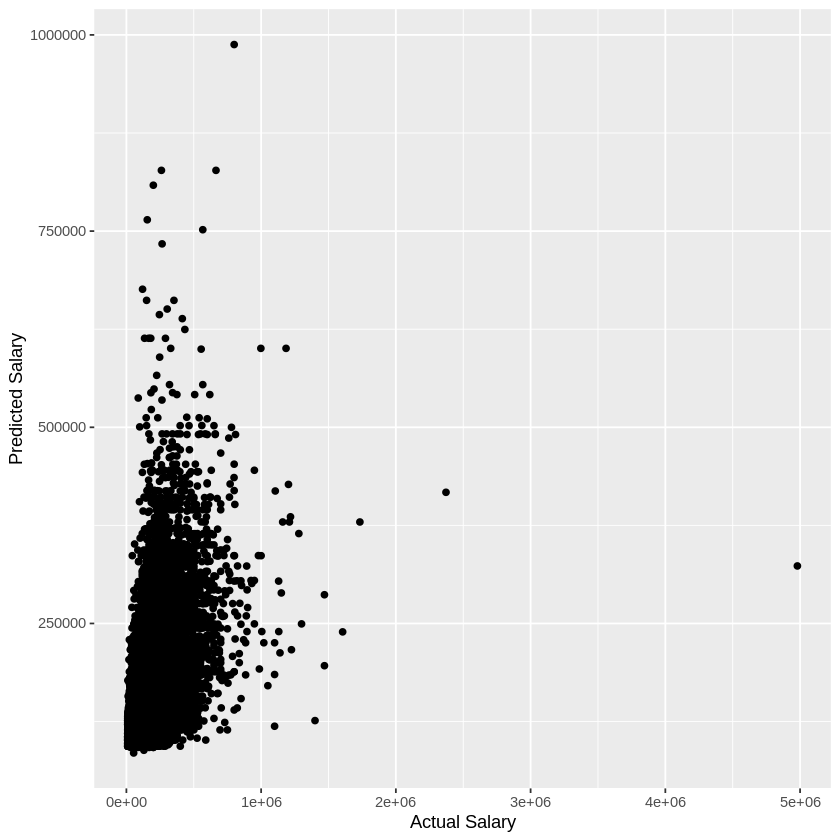

In [ ]:
##############################
# Model Evaluation
##############################
# Predict salary with the training dataset
ds2_df2_train$salary_prd <- predict(ds2_model2, ds2_df2_train)

# Calculate AIC
cat("AIC:")
AIC(ds2_model2)

# Calculate RMSE
cat("RMSE:")
rmse(ds2_df2_train$totalyearlycompensation, ds2_df2_train$salary_prd)

# Calculate MAE
cat("MAE:")
mae (ds2_df2_train$totalyearlycompensation, ds2_df2_train$salary_prd)

# Plot actual salary and predicted salary
ggplot( ds2_df2_train, aes(x=totalyearlycompensation, y=exp(salary_prd))) +
    geom_point() +
    xlab("Actual Salary") +
    ylab("Predicted Salary")

With the validation dataset, we predicted salary, calculate AIC/RMSE/MAE, and made a scatter plot. The tendency of the result of the validation data is the same as that of the result of the training data. No overfitting has occurred in this model.

RMSE:

[1] 247024.5

MAE:

[1] 201723.8

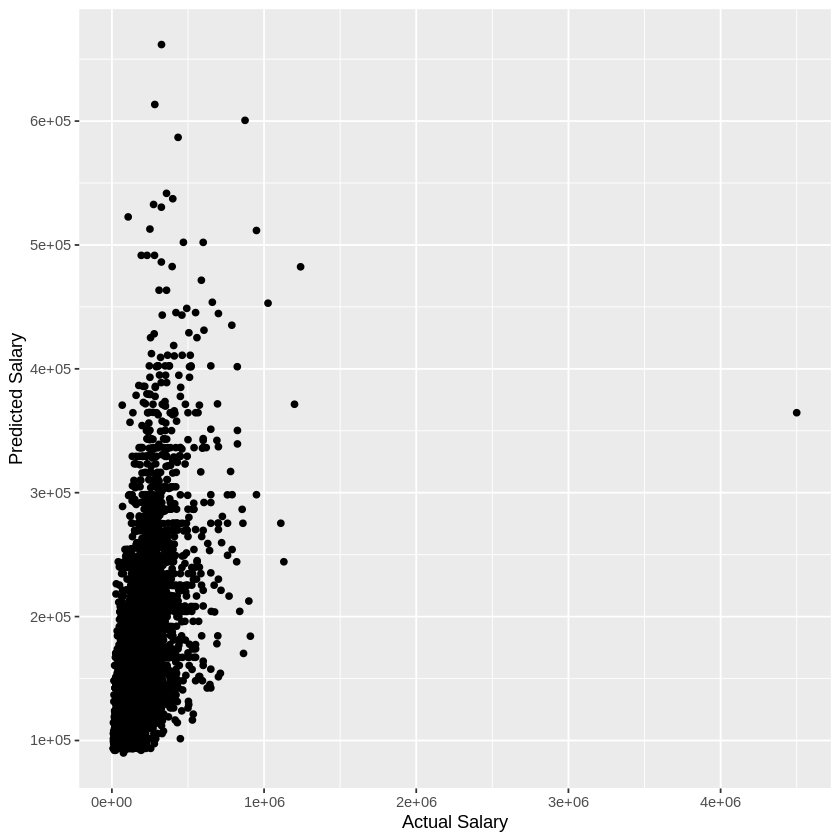

In [ ]:
##############################
# Varidate the model with "Validation" dataset
##############################
ds2_df2_test$salary_prd <- predict(ds2_model2, ds2_df2_test)
# Calculate RMSE
cat("RMSE:")
rmse(ds2_df2_test$totalyearlycompensation, ds2_df2_test$salary_prd)

# Calculate RMSE
cat("MAE:")
mae (ds2_df2_test$totalyearlycompensation, ds2_df2_test$salary_prd)

# Plot actual salary and predicted salary
ggplot(ds2_df2_test, aes(x=totalyearlycompensation, y=exp(salary_prd))) +
    geom_point() +
    xlab("Actual Salary") +
    ylab("Predicted Salary")

### <font>3. Model2-3 -- Remove Outliers / Linear-Linear model <font color='red'>*best model</font>

Our first and second models can not predict salary accurately since they are affected by outliers. Hence, based on the Exploratory Data Analysis above, we defined the rows totalyearlycompensation>1.5e+06 as outliers and remove these rows from the dataset.

In [ ]:
##############################
### Remove outliers
##############################
# Remove outliers
ds2_df3 <- ds2_df %>% filter(totalyearlycompensation>0 & totalyearlycompensation<=1.5e+06)

# Check data
str(ds2_df3)

'data.frame':	21480 obs. of  7 variables:
 $ totalyearlycompensation: int  400000 136000 337000 222000 187000 310000 113000 620000 98000 180000 ...
 $ yearsofexperience      : num  5 3 6 4 5 15 3 19 9 1 ...
 $ FAANGM                 : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 1 2 1 2 ...
 $ Data_Scientist         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Education              : Factor w/ 5 levels "Bachelor's Degree",..: 4 1 1 3 1 1 1 1 1 1 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Race                   : Factor w/ 5 levels "Asian","Black",..: 1 4 1 1 5 1 3 1 1 1 ...
 - attr(*, "na.action")= 'omit' Named int [1:21216] 1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr [1:21216] "1" "2" "3" "4" ...


We divided the dataset into training and validation sets. We create a model with the training dataset, and the model is used to predict the responses for the observations in the validation dataset. In this way, we can measure the model peformance and detect overfitting.

In [ ]:
##############################
### Split the dataset
##############################
# Split the data into "Training" and "Validation".
# Training : Validation = 8 : 2
set.seed(6203)
ds2_df3_split <- initial_split(ds2_df3, prop = 0.8)
ds2_df3_split
ds2_df3_train <- training(ds2_df3_split)
ds2_df3_test  <- testing(ds2_df3_split)

<Training/Testing/Total>
<17184/4296/21480>

The following is our third model. We fit the linear-linear regression model with lm function and displaied the result with summry function. Statistically significant (95% confidence interval) are same as the first model.

In [ ]:
##############################
# Create a Linear-Linear model
##############################
ds2_model3 <- lm(totalyearlycompensation	~ . , data=ds2_df3_train)
summary(ds2_model3)


Call:
lm(formula = totalyearlycompensation ~ ., data = ds2_df3_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-373149  -59925  -14393   41524 1251448 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               93685.2     2436.3  38.454  < 2e-16 ***
yearsofexperience          8456.4      140.9  60.010  < 2e-16 ***
FAANGM1                   68398.2     1715.4  39.873  < 2e-16 ***
Data_Scientist1           -5421.5     4213.4  -1.287  0.19821    
EducationHighschool      -11902.2     6993.7  -1.702  0.08880 .  
EducationMaster's Degree  21684.4     1746.3  12.417  < 2e-16 ***
EducationPhD              90905.4     4173.2  21.783  < 2e-16 ***
EducationSome College      4305.5     6568.8   0.655  0.51219    
genderMale                 5254.1     2103.3   2.498  0.01250 *  
RaceBlack                 -4728.0     4755.6  -0.994  0.32014    
RaceHispanic              -3279.1     3819.2  -0.859  0.39058    
RaceTwo Or More           14

We calculated Variance Inflation Factor(VIF) to detect multicollinearity. Generally, VIF greater than "5" indicates potentially multicollinearity. Multicollinearity is not occured on the third model because all VIFs are less than "5".

In [ ]:
##############################
# Check multicollinearity
##############################
# Calculate VIF
cat("VIF:")
vif (ds2_model3)

VIF:

,GVIF,Df,GVIF^(1/(2*Df))
yearsofexperience,1.049576,1,1.024488
FAANGM,1.009089,1,1.004534
Data_Scientist,1.055754,1,1.027499
Education,1.167745,4,1.019573
gender,1.009239,1,1.004609
Race,1.108432,4,1.012951


We calculated AIC (Akaike information criterion), RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error) to evaluate the model. The scatter plot below shows the comparison of actual salary and predicted salary. The third model which is fitted without outliers has a nicely balanced actual salary and predicted salary.

AIC:

[1] 446307.4

RMSE:

[1] 105490.9

MAE:

[1] 72772.25

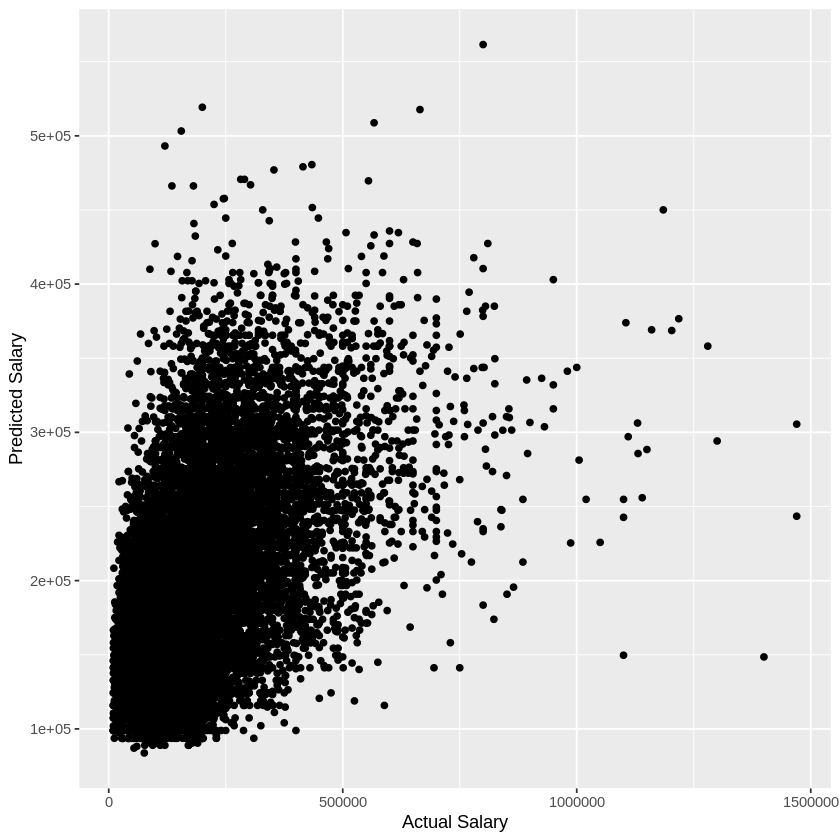

In [ ]:
##############################
# Model Evaluation
##############################
# Predict salary with the training dataset
ds2_df3_train$salary_prd <- predict(ds2_model3, ds2_df3_train)

# Calculate AIC
cat("AIC:")
AIC(ds2_model3)

# Calculate RMSE
cat("RMSE:")
rmse(ds2_df3_train$totalyearlycompensation, ds2_df3_train$salary_prd)

# Calculate MAE
cat("MAE:")
mae (ds2_df3_train$totalyearlycompensation, ds2_df3_train$salary_prd)

# Plot actual salary and predicted salary
ggplot(ds2_df3_train, aes(x=totalyearlycompensation, y=salary_prd)) +
    geom_point() +
    xlab("Actual Salary") +
    ylab("Predicted Salary")

With the validation dataset, we predicted salary, calculate AIC/RMSE/MAE, and made a scatter plot. The tendency of the result of the validation data is the same as that of the result of the training data. No overfitting has occurred in this model.

RMSE:

[1] 104865.9

MAE:

[1] 71172.62

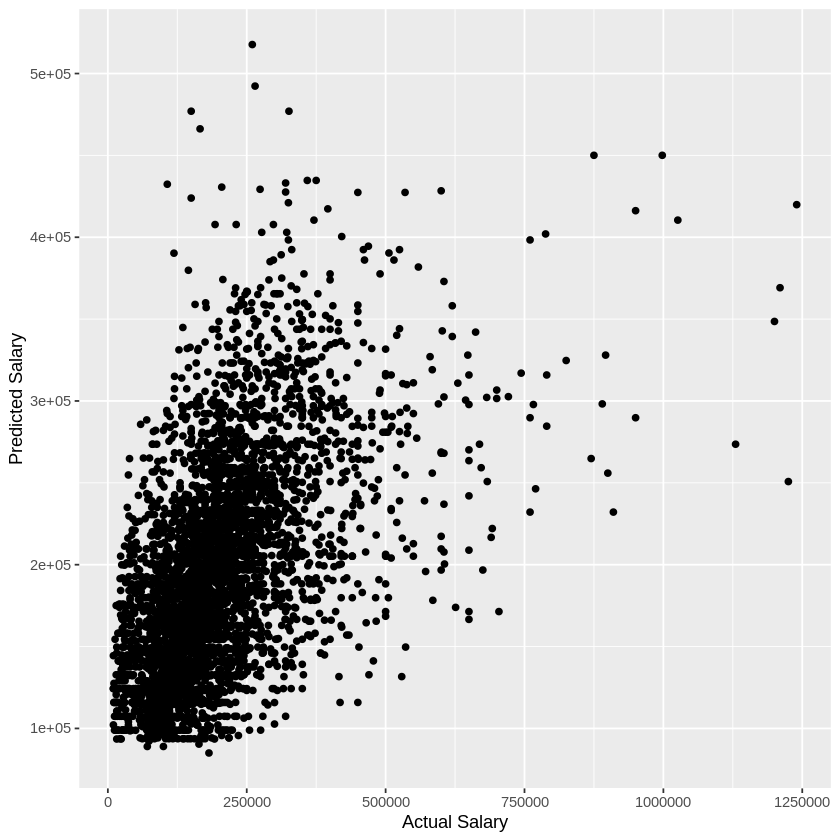

In [ ]:
##############################
# Varidate the model with "Validation" dataset
##############################
ds2_df3_test$salary_prd <- predict(ds2_model3, ds2_df3_test)
# Calculate RMSE
cat("RMSE:")
rmse(ds2_df3_test$totalyearlycompensation, ds2_df3_test$salary_prd)

# Calculate RMSE
cat("MAE:")
mae (ds2_df3_test$totalyearlycompensation, ds2_df3_test$salary_prd)

# Plot actual salary and predicted salary
ggplot(ds2_df3_test, aes(x=totalyearlycompensation, y=salary_prd)) +
    geom_point() +
    xlab("Actual Salary") +
    ylab("Predicted Salary")

### <font>4. Conclusion for Dataset2

We created the three models with the dataset2, and the third model can most accurately predict salary. We initially defined the three main objectives which we would like to accomplish with the dataset2. The following are our conclusion:<br>
1. Compare the pay of data scientists versus that of other similar roles in STEM<br>
We created  a dummy variable named "Data Scientist" (1: DataScientist, 0: Other STEM titles) and used it as one of the independent variabls. However, unfortunately, this variable is not statistically significant in the models which we create above. It means that there is no difference in salary between Data Scientists and other STEM roles in this model.<br>
<br>
2. Compare the pay of data scientists in different companies<br>
To address this objective, we created new variable "FAANGM" flag by feature engineering. FAANGM is an acronym for Facebook, Amazon, Apple, Netflix, Google, and Microsoft. "FAANGM" flag is statistically significant (95% confidence interval) in our models. Based on our best model (third model), we can say that FAANGM's salary is $68,398 higher than other companies on average.<br>
<br>
3. Compare the pay of data scientists based on demographics (gender, race, etc.)<br>
As we expected, master's degree and doctoral degree are important factors to predict salary. In addition, "Two or more races" and "RaceWhite" are alsot statistically significant in our models.


------------------------------------

## Challenges and Unfinished Business

#### NAs
One of the first challenges that we faced during our data exploration was the overwhelming amounts of NAs in some of our columns. Because our dataset originated from an annual Stackoverflow survey, this means most of our data was assimilated from people volunteering to respond which increases the amount of human error in the process.

For example, our race column in one of our dataset had up to 50% of NAs which was probably caused by people unwilling to share private information about themselves.With situations like this, we either have to impute the data with some form of prediction modeling or just remove those data points completely.
Due to time constraints, we decided to just remove the rows with missing values in this example completely. The downside of removing all those rows is that now we won’t be sure if the results of our analysis will be significant and applicable to the entire population of data scientists.

Luckily, we still had other useful columns that we conducted our analysis on; however, if we had more time to work on this project, we would definitely find better ways to impute this data instead of removing it so that we can retain the maximum amount of information.


#### Technical Skills
If you click on the link and head to the source of our first dataset, there are actually 2 datasets available there. We only ended up using one of them due to the fact that it was much bigger and had a lot more columns. However, in the other dataset (also from a Stackoverflow survey), there were columns about the different tech stacks that data scientists use during their jobs or enjoy the most. We really wanted to use this dataset, but due to time constraint and the fact that it was much smaller than our other 2 datasets, we decided to skip it. 

If we were to conduct an analysis using that dataset, we could potentially discover even more insights about this role. For example, we could try to find the relationship between different technical skills, whether its a basic coding language like Python or database language like SQL, to salary. We could do exactly what we did for the first dataset: create one-hot encodings on all the categorical variables for the different tech stacks and create models to interpret coefficients. This analysis will ultimately help people understand which languages and technical skills they should prioritize in learning in order to capture the attention of top companies. 

------------------------------------

## Key Takeaways



Nowadays, everyone wants to work in the tech industry. Whether it’s to become a software engineer or data scientist, it is important to realize and understand what it takes to get there and getting paid your dream salary. 
We were able to discover many interesting things about the Data Science position. 

Firstly, we were correct when we hypothesized that having more coding experience and a higher education will get you paid more especially if you have a doctoral degree. Your experiences both in academia and industry will translate onto your resume nicely and help you bargain with your employer.

Out of all the data related roles, Data Engineers are paid the most followed by Data Scientists which is expected since data engineers need to deal with most of the technical and backend aspects of the data pipeline while data scientists often have to train complicated machine learning models. 

Contrary to popular belief though, being a computer science or engineering major does not grant you higher pay in the Data Science position while majors in Arts, Humanities, Business, Math or Stats do have a positive impact on your salary. We suspect this is because even though coding is an important tool for Data Scientists, they must also understand the business context at hand in order to communicate their analysis to stakeholders or people who have no technical background in the material. 

Finally, there is no doubt that large and reputable companies like Google, Amazon, Facebook and Microsoft pay higher salaries compared to smaller companies which is as expected since the higher the revenue, the higher the pay. This was also mentioned in some of the research that we referred to in the beginning of our paper.

We hope that with all this analysis, both employers and aspiring data scientists are able to capitalize on what we've discovered about the position.  Not only to help people achieve their dream salary and companies hire more effectively, but also for people to become more well-rounded data scientists so that they can contribute their findings to the world. 


------------------------------------

## References

*  Georgia Tech MS Analytics Placement Statistics (https://www.analytics.gatech.edu/career-services/placement)
*  How Much Is a Data Scientist’s Salary? (https://datasciencedegree.wisconsin.edu/data-science/data-scientist-salary/)
*  Data Science Salary Expectations in 2022 (https://www.datacamp.com/blog/data-science-salaries)